<b><h3>Introduction</h3></b>

Based on input features like gender, age, various diseases, and smoking status, this dataset is used to predict whether a patient is likely to get a stroke. 

About the Data: Each row in the data contains important details about an individual, such as age, gender, smoking status, and stroke occurrence.

<br></br>
<b><h2>Phase1: Data analysis & preparation</h2></b>

<br></br>
<b><h2>Importing Python Libraries</h2></b>

In [1]:
import random
import numpy as np
from pprint import pprint
import pandas as pd
import seaborn as sns
import missingno as msno
import os

import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint

<br></br>
<b><h2>Loading the Data</h2></b>

In [2]:
# Load dataset
df = pd.read_csv('stroke_data.csv', delimiter = ',')
print(df.shape)
df.head(10)

(40910, 11)


,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,63.0,0,1,1,4,1,228.69,36.6,1,1
1,1.0,42.0,0,1,1,4,0,105.92,32.5,0,1
2,0.0,61.0,0,0,1,4,1,171.23,34.4,1,1
3,1.0,41.0,1,0,1,3,0,174.12,24.0,0,1
4,1.0,85.0,0,0,1,4,1,186.21,29.0,1,1
5,1.0,55.0,1,1,1,4,0,70.09,27.4,0,1
6,0.0,82.0,0,0,0,4,1,94.39,22.8,0,1
7,0.0,17.0,1,0,1,4,0,80.43,29.7,0,1
8,1.0,31.0,0,1,1,2,0,120.46,36.8,1,1
9,0.0,55.0,0,0,1,4,1,104.51,27.3,1,1


<br></br>
<b><h2>Insights</h2></b>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40910 entries, 0 to 40909
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                40907 non-null  float64
 1   age                40910 non-null  float64
 2   hypertension       40910 non-null  int64  
 3   heart_disease      40910 non-null  int64  
 4   ever_married       40910 non-null  int64  
 5   work_type          40910 non-null  int64  
 6   Residence_type     40910 non-null  int64  
 7   avg_glucose_level  40910 non-null  float64
 8   bmi                40910 non-null  float64
 9   smoking_status     40910 non-null  int64  
 10  stroke             40910 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 3.4 MB


In [4]:
df.describe(include="all")

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,40907.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000
mean,0.555162,51.327255,0.213835,0.127719,0.821340,3.461134,0.514886,122.075901,30.406355,0.488609,0.500122
std,0.496954,21.623969,0.410017,0.333781,0.383072,0.780919,0.499784,57.561531,6.835072,0.499876,0.500006
min,0.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,11.500000,0.000000,0.000000
25%,0.000000,35.000000,0.000000,0.000000,1.000000,3.000000,0.000000,78.750000,25.900000,0.000000,0.000000
50%,1.000000,52.000000,0.000000,0.000000,1.000000,4.000000,1.000000,97.920000,29.400000,0.000000,1.000000
75%,1.000000,68.000000,0.000000,0.000000,1.000000,4.000000,1.000000,167.590000,34.100000,1.000000,1.000000
max,1.000000,103.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,92.000000,1.000000,1.000000


In [5]:
# df.loc[:, "DeadlineRespected"].value_counts(normalize=True) * 100
df.loc[:, "stroke"].value_counts()

1    20460
0    20450
Name: stroke, dtype: int64

In [6]:
(df.loc[:, "stroke"] == 1).sum()

20460

<br></br>
<b><h2>Data Cleaning</h2></b>

In [7]:
# Check for missing data and duplicates
df.isnull().sum()
df.dropna(inplace = True)
df.shape
# print('Duplicates:', df.duplicated().sum())

(40907, 11)

<AxesSubplot:>

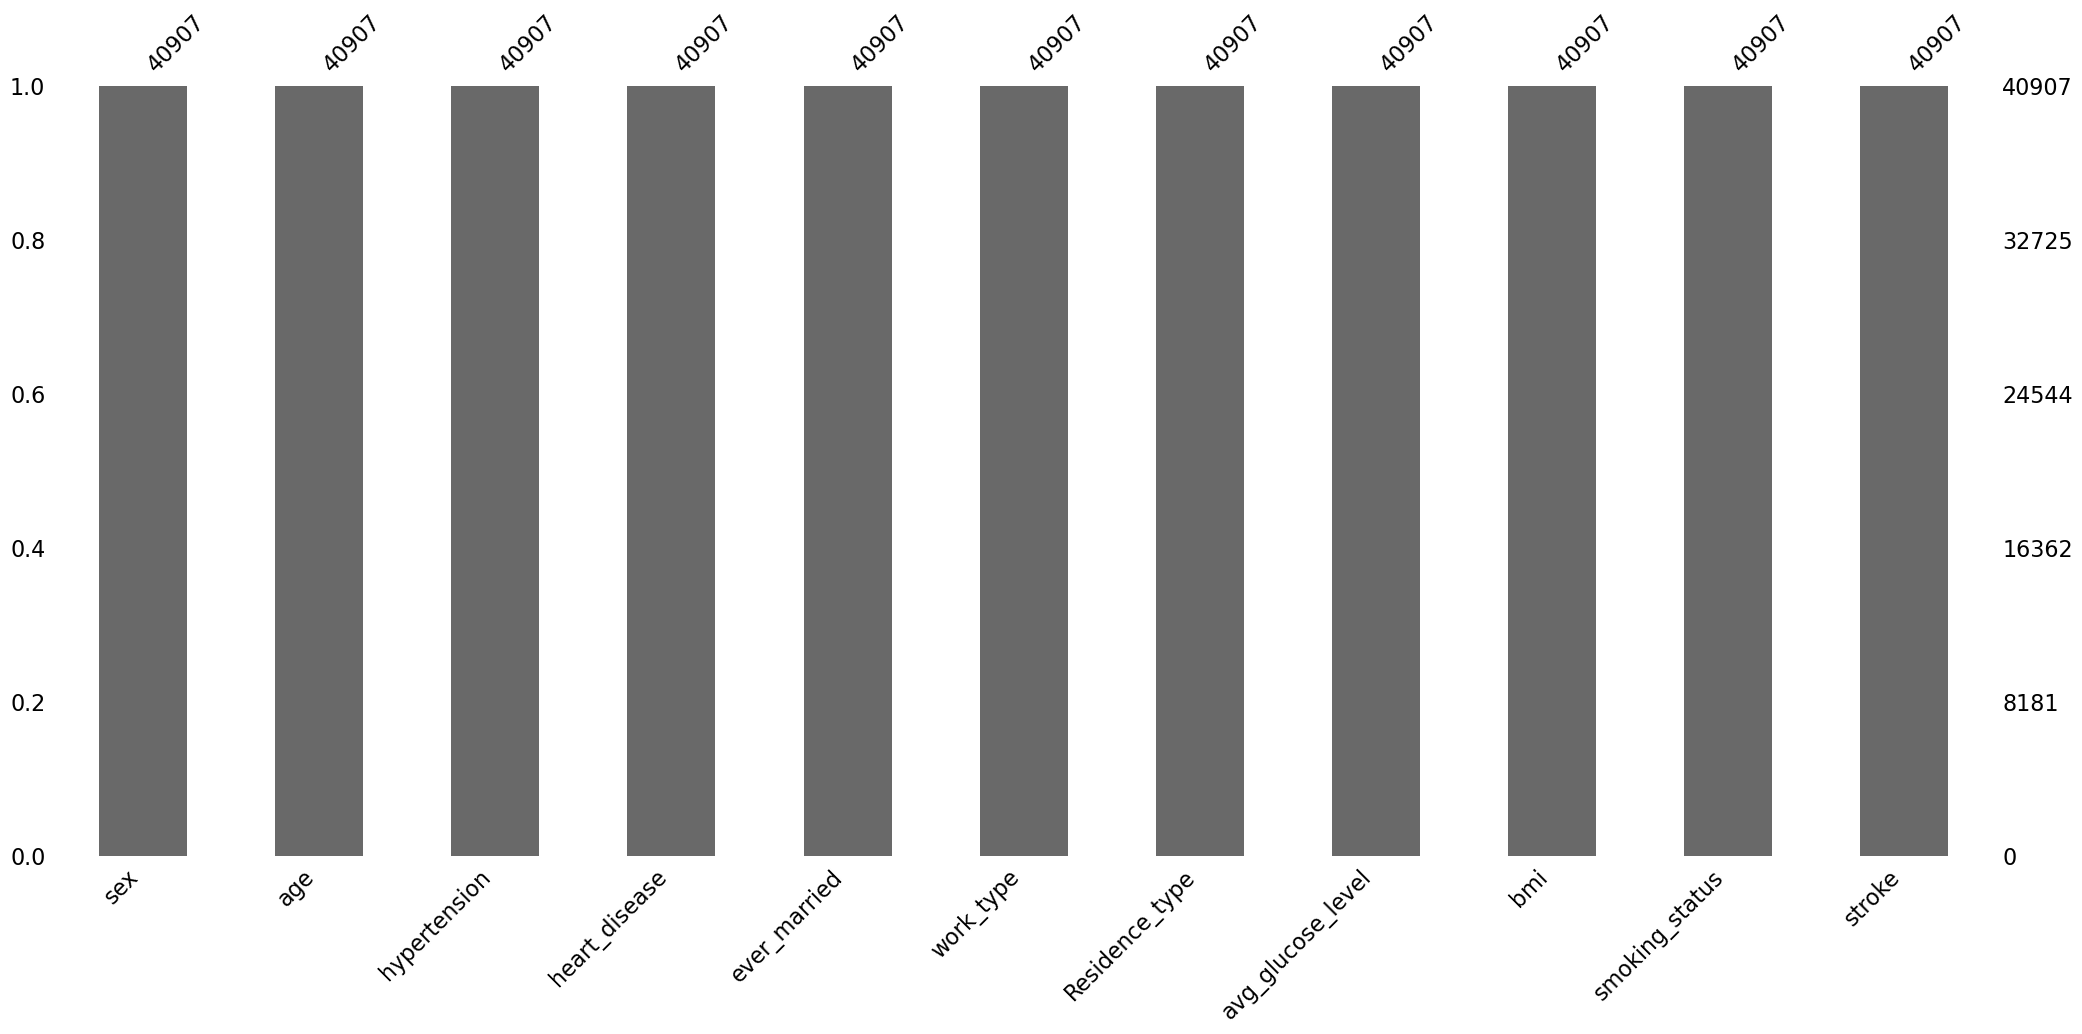

In [8]:
msno.bar(df)

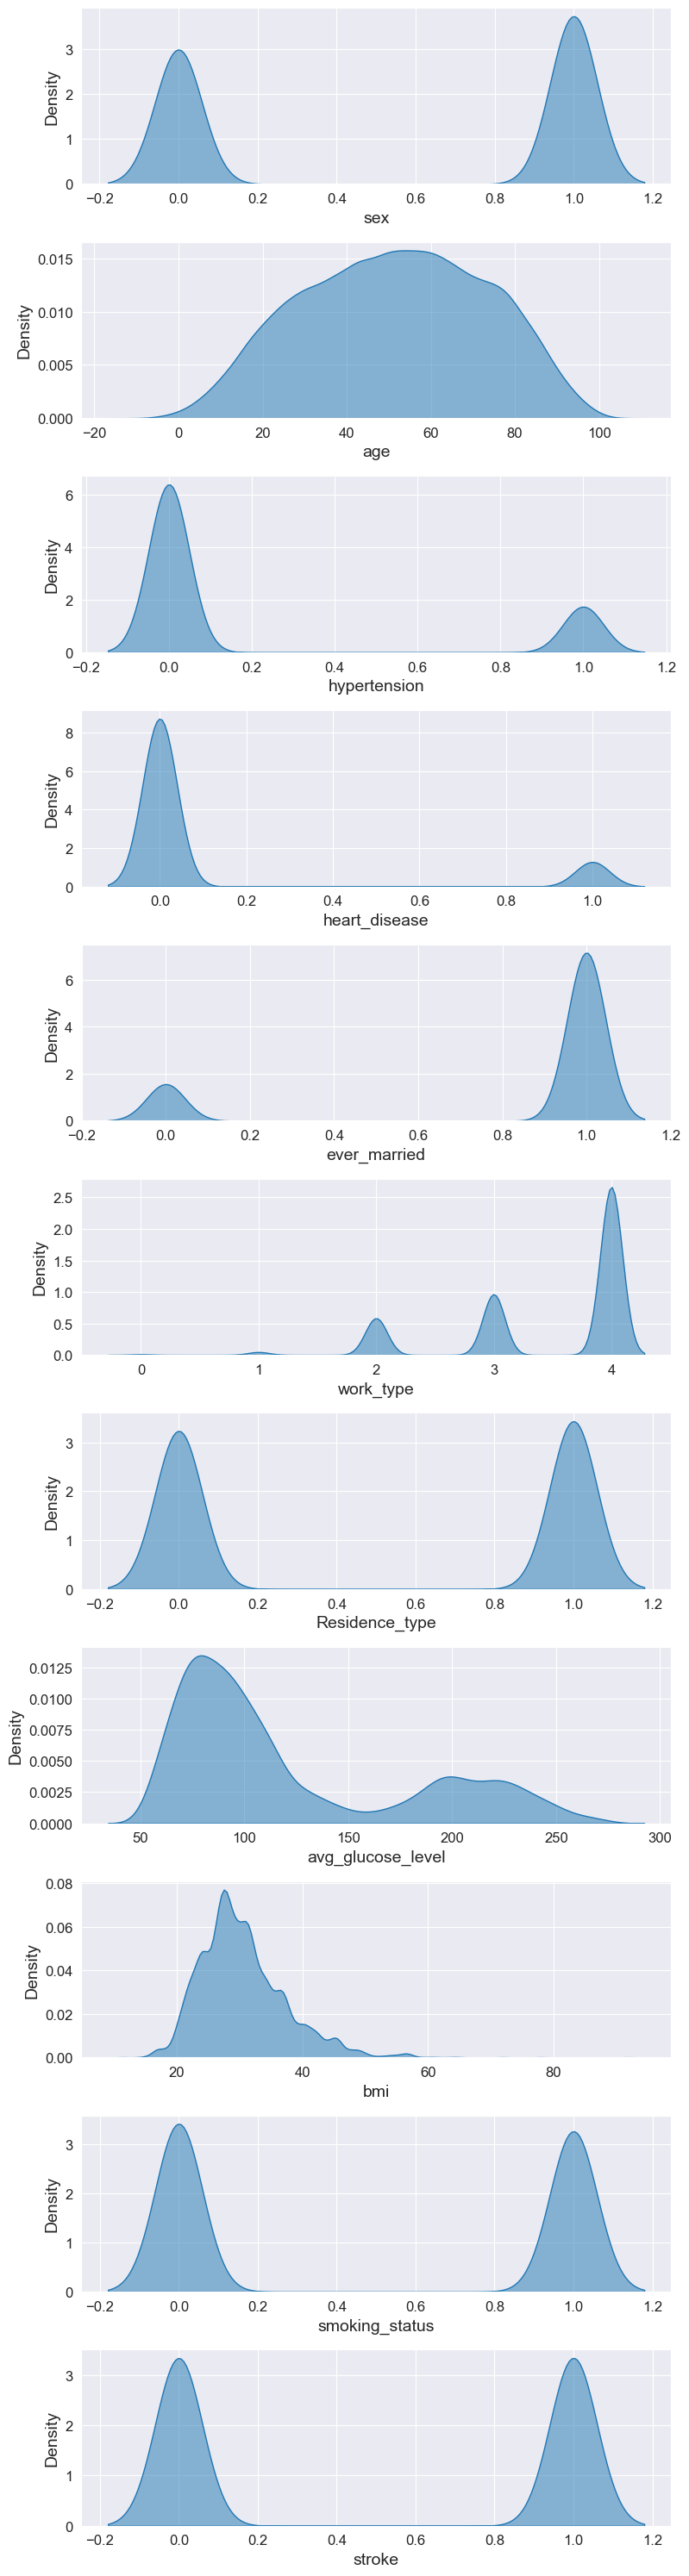

In [9]:
# Select the 11 features to plot
features = ["sex", "age", "hypertension", "heart_disease", "ever_married", 
            "work_type", "Residence_type", "avg_glucose_level", "bmi", "smoking_status", "stroke"]

# Set the plot style
sns.set_style("darkgrid")

# Create a subplot for each feature
fig, axs = plt.subplots(11, 1, figsize=(8, 30))

# Loop through each feature and plot the density chart
for i, feature in enumerate(features):
    sns.kdeplot(data=df, x=feature, ax=axs[i], fill=True, alpha=0.5)
    axs[i].set_xlabel(feature, fontsize=14)
    axs[i].set_ylabel("Density", fontsize=14)
    axs[i].tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()
plt.show()


<AxesSubplot:xlabel='stroke', ylabel='count'>

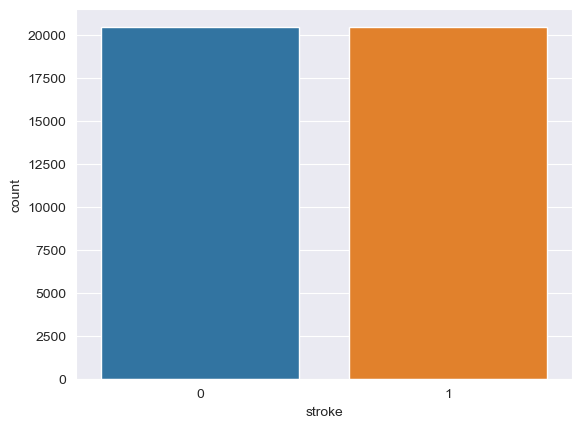

In [10]:
sns.countplot(data = df, x="stroke")

In [11]:
percentage = df.loc[:, "stroke"].value_counts(normalize=True) * 100
percentage

1    50.01589
0    49.98411
Name: stroke, dtype: float64

<b> Pie chart distribution of DeadlineRespected label </b>

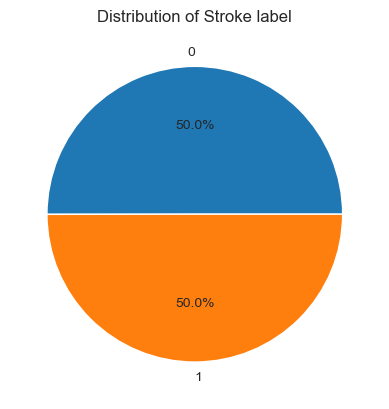

In [12]:
plt.pie(percentage, labels=["0", "1"], autopct = "%1.1f%%")
plt.title("Distribution of Stroke label")
plt.show()

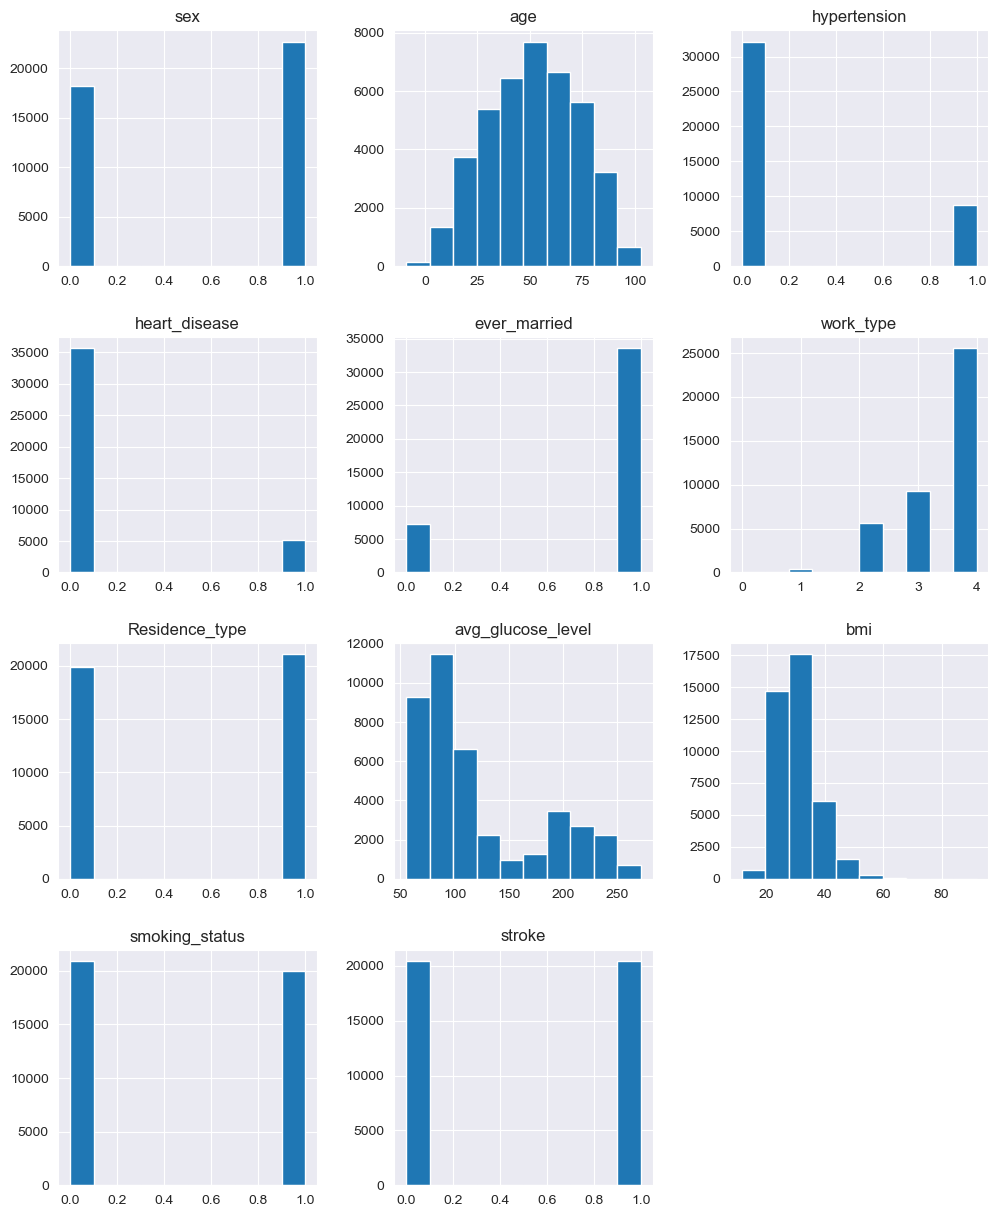

Above mean: 0.5001588970102916
Below mean: 0.49984110298970835


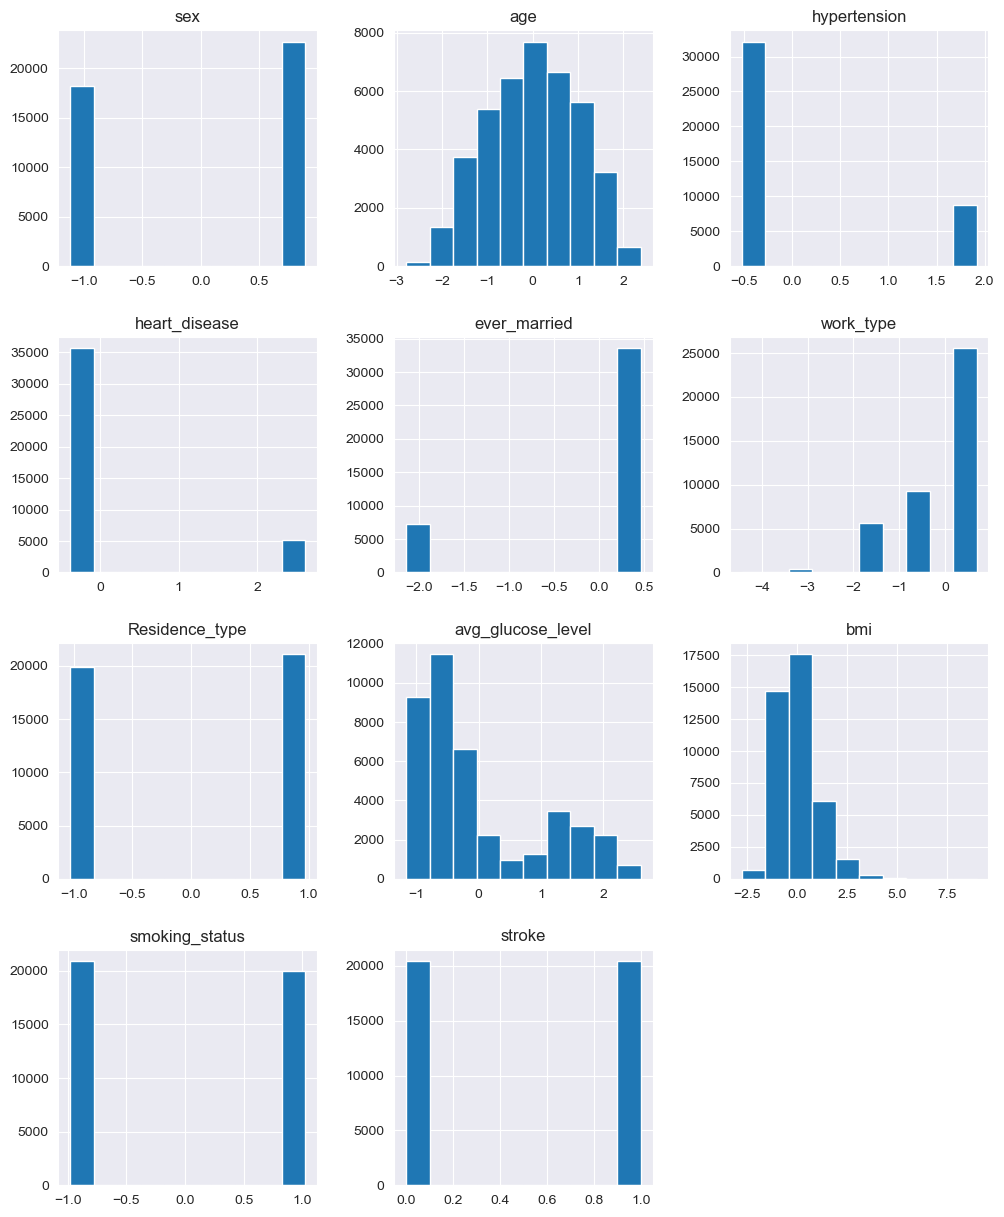

In [13]:
#Visualization before Normalization
df.hist(figsize=(12,15))
plt.show()


# Check balance of output labels
above_mean = (df['stroke'] > df['stroke'].mean()).sum()
below_mean = len(df) - above_mean
print('Above mean:', above_mean/len(df))
print('Below mean:', below_mean/len(df))

# # Normalize data
# min_val = min(df_new)
# max_val = max(df_new)
    
# # # Calculate the range of the data
# # data_range = max_val - min_val
    
    # Normalize the data
def z_score_normalization(column_name):
    series = df.loc[:, column_name]
    return (series - series.mean())/series.std()
    
# Iterates over all the continuous columns and applies z_score_normalization to each column
for column_name in df.columns:
    if column_name != "stroke":
        df[column_name] = z_score_normalization(column_name=column_name)

#Visualization after Normalization
df.hist(figsize=(12,15))
plt.show()


In [14]:
print(df.shape)

(40907, 11)


In [15]:
df.describe(include="all")

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,4.090700e+04,4.090700e+04,4.090700e+04,4.090700e+04,4.090700e+04,4.090700e+04,4.090700e+04,4.090700e+04,4.090700e+04,4.090700e+04,40907.000000
mean,3.956880e-15,-9.745113e-16,1.047496e-13,-1.623959e-16,1.750781e-14,1.187697e-15,-3.912126e-15,8.623756e-15,-7.403656e-14,-3.228383e-15,0.500159
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.500006
min,-1.117129e+00,-2.789809e+00,-5.215522e-01,-3.826602e-01,-2.143988e+00,-4.431995e+00,-1.030143e+00,-1.163263e+00,-2.766005e+00,-9.773867e-01,0.000000
25%,-1.117129e+00,-7.550488e-01,-5.215522e-01,-3.826602e-01,4.664090e-01,-5.904402e-01,-1.030143e+00,-7.527486e-01,-6.592958e-01,-9.773867e-01,0.000000
50%,8.951298e-01,3.110855e-02,-5.215522e-01,-3.826602e-01,4.664090e-01,6.900782e-01,9.707149e-01,-4.197161e-01,-1.472484e-01,-9.773867e-01,1.000000
75%,8.951298e-01,7.710213e-01,-5.215522e-01,-3.826602e-01,4.664090e-01,6.900782e-01,9.707149e-01,7.906320e-01,5.403580e-01,1.023112e+00,1.000000
max,8.951298e-01,2.389580e+00,1.917307e+00,2.613221e+00,4.664090e-01,6.900782e-01,9.707149e-01,2.599987e+00,9.011084e+00,1.023112e+00,1.000000


In [16]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

<br></br>
<b><h2>Phase2: Build a model to overfit the entire dataset</h2></b>

In [148]:
# df_new = df.sample(frac=0.6)

In [232]:
# X = df_new.iloc[:, :-1].values
# y = df_new.iloc[:, -1].values

In [20]:
model = Sequential()

model.add(Dense(1, input_dim = df.shape[1] -1, activation = 'sigmoid'))
# model.add(Dense(16, activation = 'relu'))
# model.add(Dense(1, activation = 'sigmoid'))

In [21]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
# checkpoint_file
# print(model.summary())

In [22]:
history = model.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
1279/1279 [==============================] - 2s 1ms/step - loss: 0.7204 - accuracy: 0.5904
Epoch 2/100
1279/1279 [==============================] - 1s 1ms/step - loss: 0.6040 - accuracy: 0.6826
Epoch 3/100
1279/1279 [==============================] - 1s 1ms/step - loss: 0.5998 - accuracy: 0.6848
Epoch 4/100
1279/1279 [==============================] - 1s 1ms/step - loss: 0.5997 - accuracy: 0.6835
Epoch 5/100
1279/1279 [==============================] - 1s 1ms/step - loss: 0.5997 - accuracy: 0.6828
Epoch 6/100
1279/1279 [==============================] - 1s 1ms/step - loss: 0.5997 - accuracy: 0.6836
Epoch 7/100
1279/1279 [==============================] - 2s 1ms/step - loss: 0.5997 - accuracy: 0.6823
Epoch 8/100
1279/1279 [==============================] - 2s 1ms/step - loss: 0.5997 - accuracy: 0.6839
Epoch 9/100
1279/1279 [==============================] - 2s 1ms/step - loss: 0.5997 - accuracy: 0.6830
Epoch 10/100
1279/1279 [==============================] - 2s 2ms/step - l

In [23]:
history.history["accuracy"][99]

0.6821815371513367

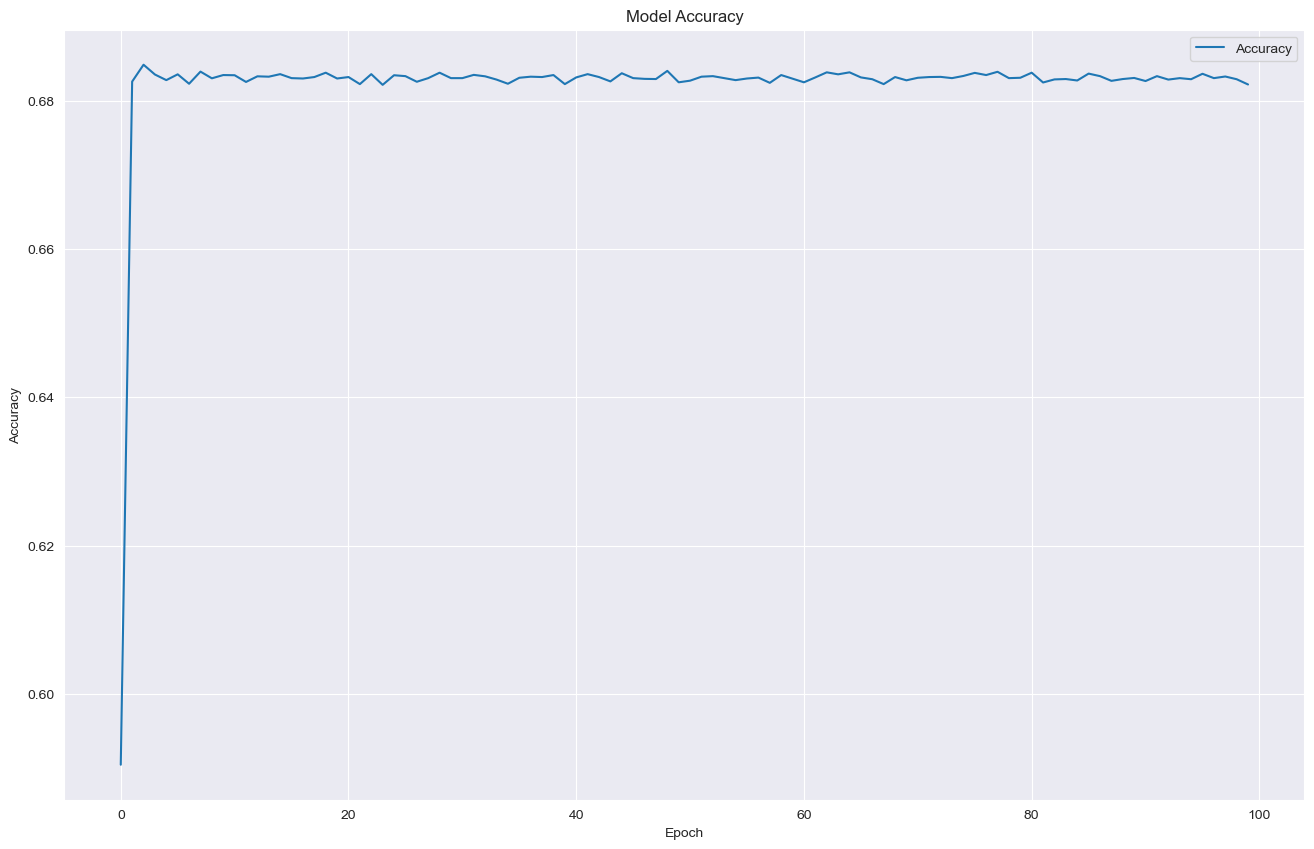

In [24]:
# Create a pandas DataFrame with "accuracy" and "Val accuracy" columns
data = pd.DataFrame({'Accuracy': history.history['accuracy']})

plt.figure(figsize=(16, 10))

sns.lineplot(data=data)

plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.show()

In [26]:
model1 = Sequential()

model1.add(Dense(16, activation="relu", input_dim=df.shape[1] - 1))
model1.add(Dense(8, activation="relu"))
model1.add(Dense(1, activation="sigmoid"))

model1.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [27]:
history1 = model1.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
1279/1279 [==============================] - 2s 1ms/step - loss: 0.5861 - accuracy: 0.6889
Epoch 2/100
1279/1279 [==============================] - 2s 1ms/step - loss: 0.5507 - accuracy: 0.7188
Epoch 3/100
1279/1279 [==============================] - 1s 1ms/step - loss: 0.5288 - accuracy: 0.7326
Epoch 4/100
1279/1279 [==============================] - 1s 1ms/step - loss: 0.5141 - accuracy: 0.7410
Epoch 5/100
1279/1279 [==============================] - 2s 1ms/step - loss: 0.5016 - accuracy: 0.7487
Epoch 6/100
1279/1279 [==============================] - 2s 1ms/step - loss: 0.4916 - accuracy: 0.7556
Epoch 7/100
1279/1279 [==============================] - 2s 2ms/step - loss: 0.4811 - accuracy: 0.7606
Epoch 8/100
1279/1279 [==============================] - 2s 1ms/step - loss: 0.4709 - accuracy: 0.7670
Epoch 9/100
1279/1279 [==============================] - 1s 1ms/step - loss: 0.4607 - accuracy: 0.7743
Epoch 10/100
1279/1279 [==============================] - 1s 1ms/step - l

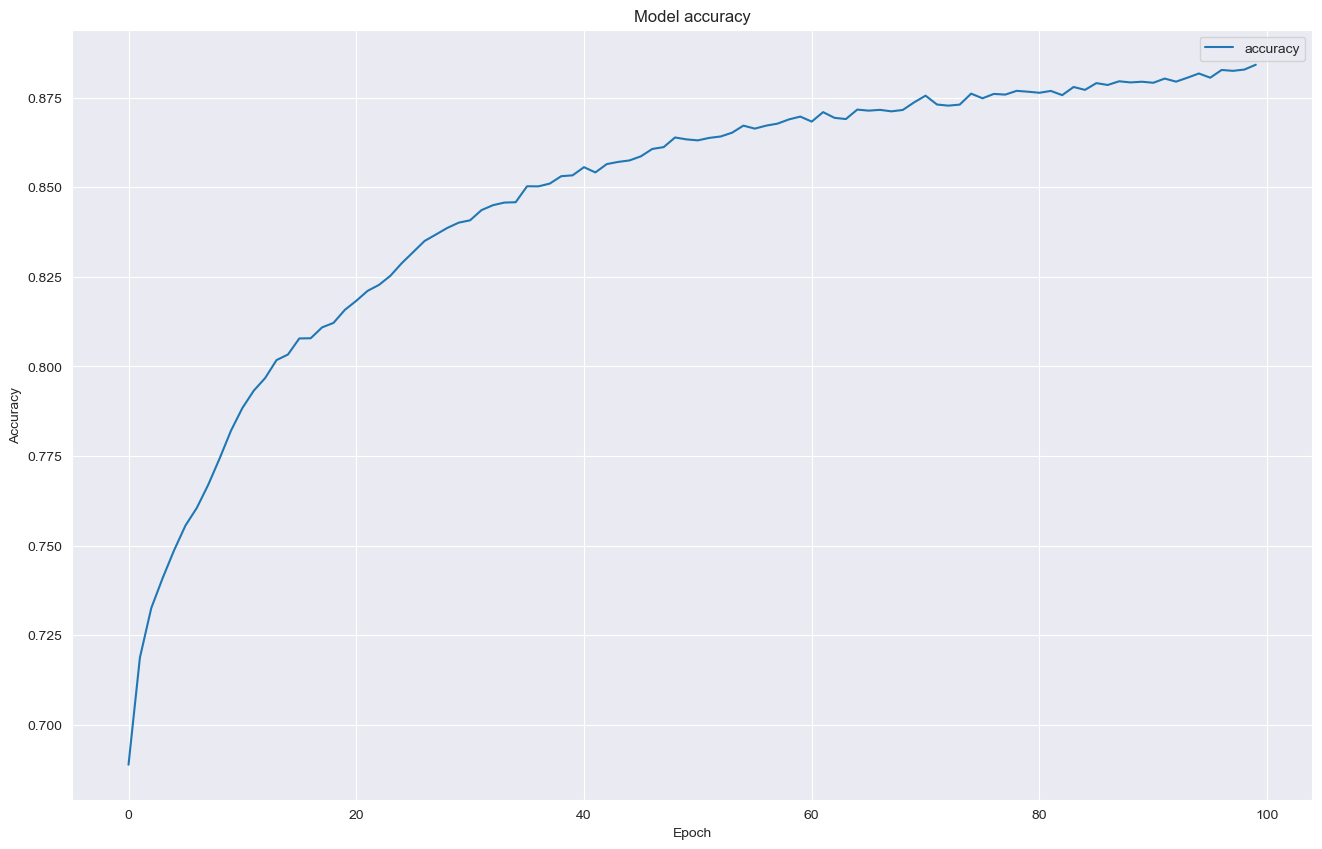

In [28]:
# Create a pandas DataFrame with "accuracy" and "Val accuracy" columns
data1 = pd.DataFrame({'accuracy': history1.history['accuracy']})

plt.figure(figsize=(16, 10))

sns.lineplot(data=data1)

plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.show()

In [29]:
model2 = Sequential()

model2.add(Dense(32, activation="relu", input_dim=df.shape[1] - 1))
model2.add(Dense(16, activation="relu"))
model2.add(Dense(8, activation="relu"))
model2.add(Dense(1, activation="sigmoid"))

model2.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [30]:
history2 = model2.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
1279/1279 [==============================] - 2s 1ms/step - loss: 0.5590 - accuracy: 0.7085
Epoch 2/100
1279/1279 [==============================] - 2s 1ms/step - loss: 0.5082 - accuracy: 0.7379
Epoch 3/100
1279/1279 [==============================] - 1s 1ms/step - loss: 0.4683 - accuracy: 0.7654
Epoch 4/100
1279/1279 [==============================] - 2s 1ms/step - loss: 0.4256 - accuracy: 0.7930
Epoch 5/100
1279/1279 [==============================] - 1s 1ms/step - loss: 0.3909 - accuracy: 0.8135
Epoch 6/100
1279/1279 [==============================] - 2s 1ms/step - loss: 0.3600 - accuracy: 0.8323
Epoch 7/100
1279/1279 [==============================] - 2s 1ms/step - loss: 0.3347 - accuracy: 0.8464
Epoch 8/100
1279/1279 [==============================] - 1s 1ms/step - loss: 0.3145 - accuracy: 0.8569
Epoch 9/100
1279/1279 [==============================] - 2s 1ms/step - loss: 0.2989 - accuracy: 0.8670
Epoch 10/100
1279/1279 [==============================] - 2s 1ms/step - l

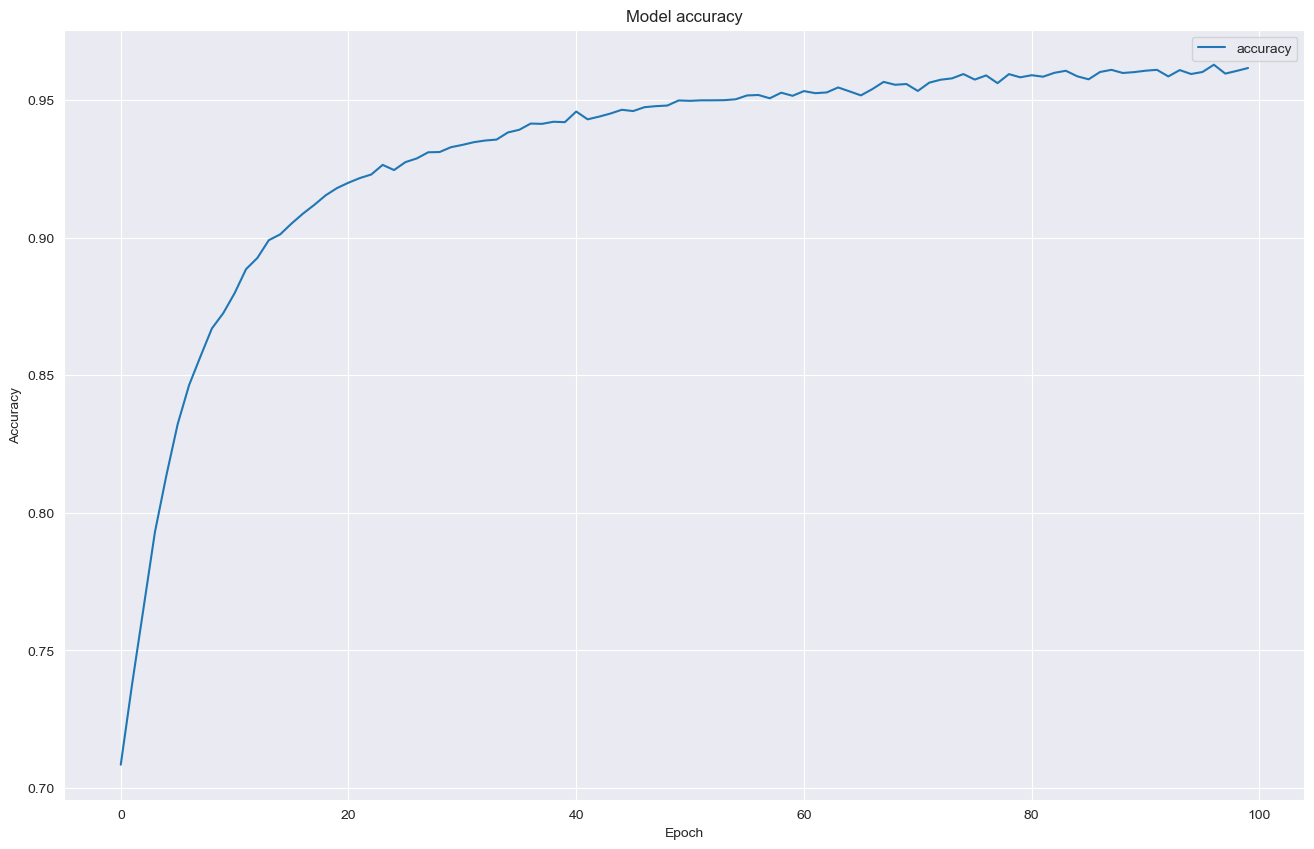

In [31]:
# Create a pandas DataFrame with "accuracy" and "Val accuracy" columns
data1 = pd.DataFrame({'accuracy': history2.history['accuracy']})

plt.figure(figsize=(16, 10))

sns.lineplot(data=data1)

plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.show()

In [32]:
model3 = Sequential()

model3.add(Dense(32, activation="tanh", input_dim=df.shape[1] - 1))
model3.add(Dense(16, activation="tanh"))
model3.add(Dense(8, activation="tanh"))
model3.add(Dense(1, activation="sigmoid"))

model3.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [33]:
history3 = model3.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
1279/1279 [==============================] - 2s 2ms/step - loss: 0.5901 - accuracy: 0.6879
Epoch 2/100
1279/1279 [==============================] - 2s 1ms/step - loss: 0.5429 - accuracy: 0.7218
Epoch 3/100
1279/1279 [==============================] - 2s 1ms/step - loss: 0.5096 - accuracy: 0.7420
Epoch 4/100
1279/1279 [==============================] - 1s 1ms/step - loss: 0.4838 - accuracy: 0.7548
Epoch 5/100
1279/1279 [==============================] - 2s 1ms/step - loss: 0.4599 - accuracy: 0.7713
Epoch 6/100
1279/1279 [==============================] - 2s 1ms/step - loss: 0.4381 - accuracy: 0.7845
Epoch 7/100
1279/1279 [==============================] - 2s 1ms/step - loss: 0.4164 - accuracy: 0.7953
Epoch 8/100
1279/1279 [==============================] - 2s 1ms/step - loss: 0.3945 - accuracy: 0.8080
Epoch 9/100
1279/1279 [==============================] - 2s 1ms/step - loss: 0.3729 - accuracy: 0.8226
Epoch 10/100
1279/1279 [==============================] - 2s 1ms/step - l

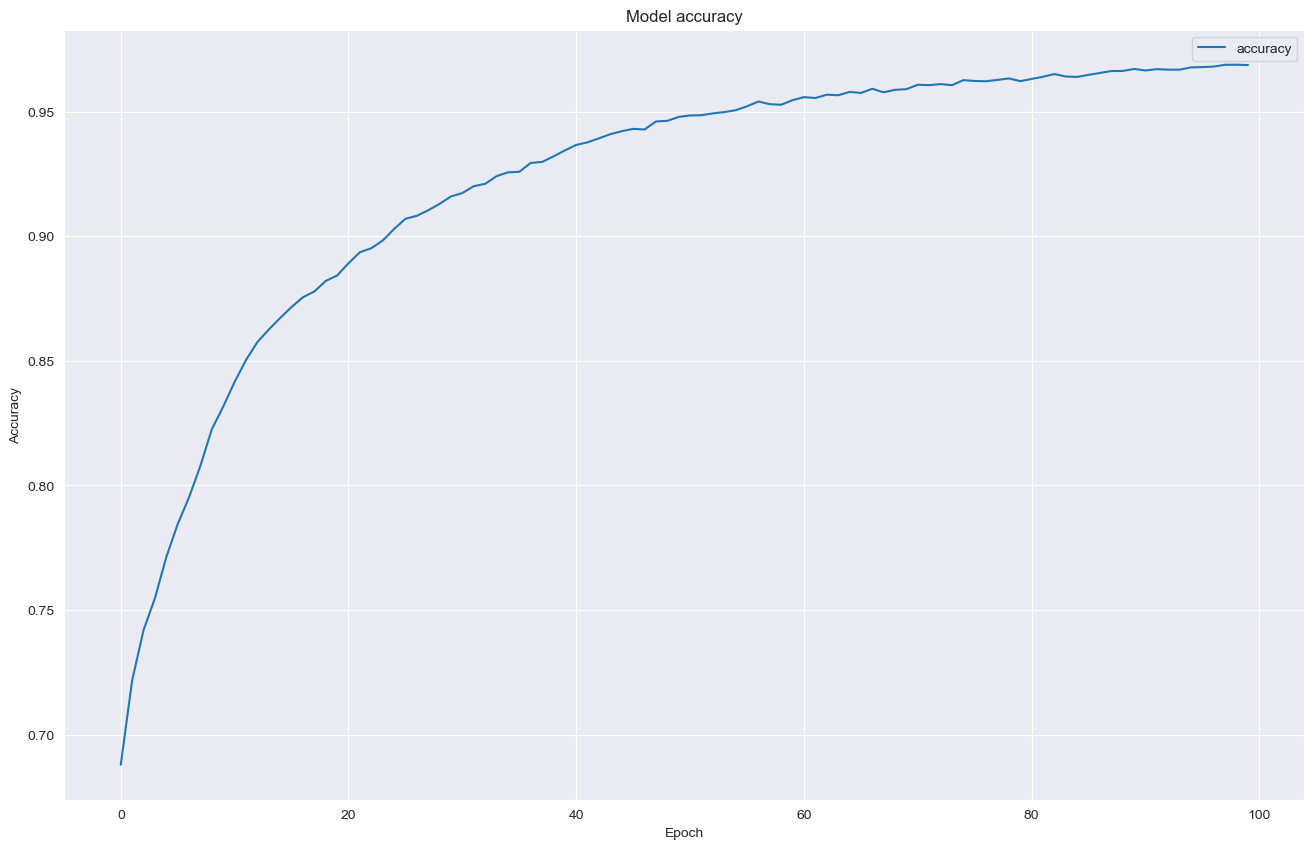

In [34]:
# Create a pandas DataFrame with "accuracy" and "Val accuracy" columns
data1 = pd.DataFrame({'accuracy': history3.history['accuracy']})

plt.figure(figsize=(16, 10))

sns.lineplot(data=data1)

plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.show()

In [35]:
model4 = Sequential()

model4.add(Dense(40, activation="tanh", input_dim=df.shape[1] - 1))
model4.add(Dense(32, activation="tanh"))
model4.add(Dense(24, activation="tanh"))
model4.add(Dense(8, activation="tanh"))
model4.add(Dense(1, activation="sigmoid"))

model4.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [36]:
history4 = model4.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
1279/1279 [==============================] - 3s 1ms/step - loss: 0.5747 - accuracy: 0.7001
Epoch 2/100
1279/1279 [==============================] - 2s 1ms/step - loss: 0.5133 - accuracy: 0.7407
Epoch 3/100
1279/1279 [==============================] - 2s 2ms/step - loss: 0.4581 - accuracy: 0.7796
Epoch 4/100
1279/1279 [==============================] - 2s 1ms/step - loss: 0.4104 - accuracy: 0.8101
Epoch 5/100
1279/1279 [==============================] - 2s 1ms/step - loss: 0.3673 - accuracy: 0.8366
Epoch 6/100
1279/1279 [==============================] - 2s 1ms/step - loss: 0.3304 - accuracy: 0.8528
Epoch 7/100
1279/1279 [==============================] - 2s 1ms/step - loss: 0.2940 - accuracy: 0.8695
Epoch 8/100
1279/1279 [==============================] - 2s 1ms/step - loss: 0.2650 - accuracy: 0.8816
Epoch 9/100
1279/1279 [==============================] - 2s 2ms/step - loss: 0.2402 - accuracy: 0.8944
Epoch 10/100
1279/1279 [==============================] - 2s 1ms/step - l

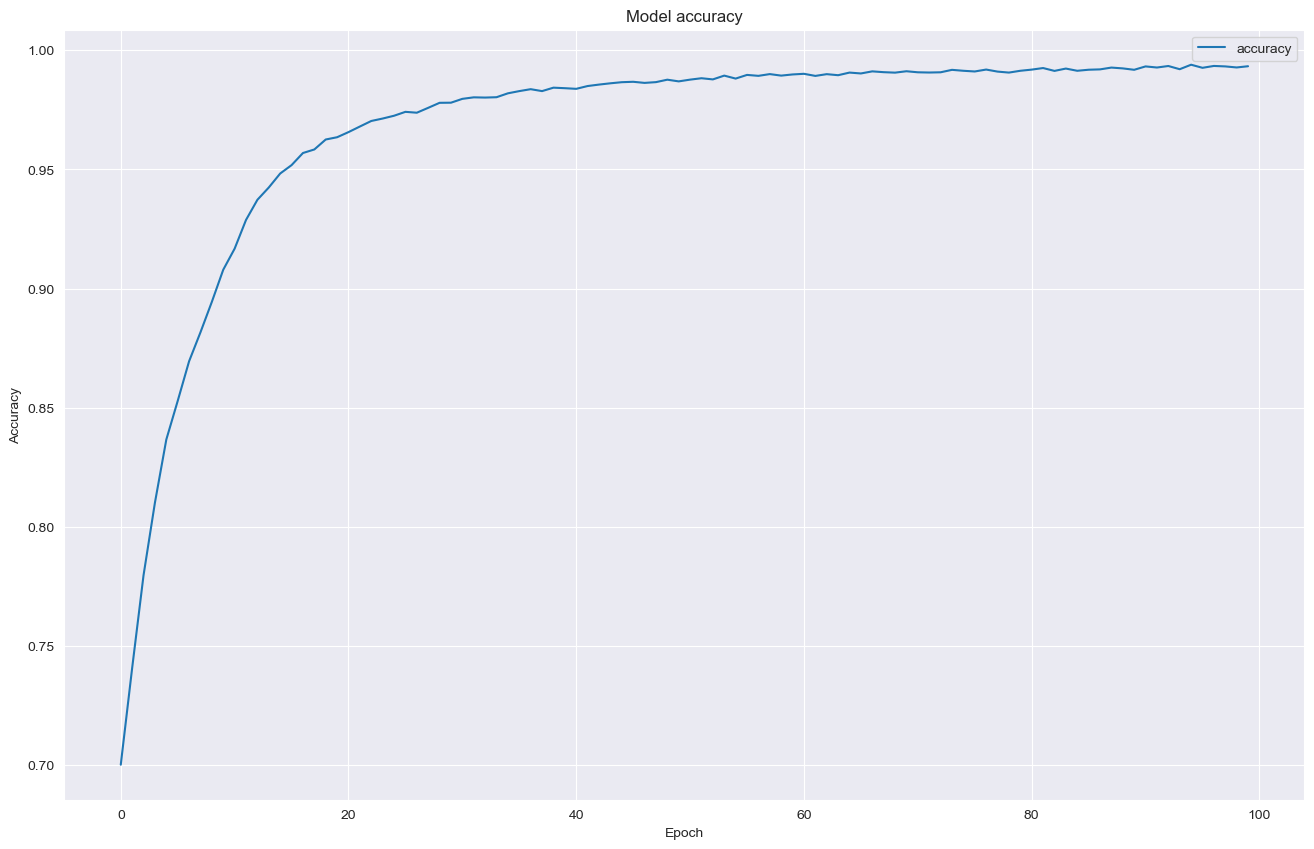

In [52]:
# Create a pandas DataFrame with "accuracy" and "Val accuracy" columns
data1 = pd.DataFrame({'accuracy': history4.history['accuracy']})

plt.figure(figsize=(16, 10))

sns.lineplot(data=data1)

plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.show()

<h5>Observation</h5><br>


The above model is a neural network with 5 layers for binary classification. It has 40 neurons in the input layer and uses the 'tanh' activation function. The 3 hidden layers have 32, 24, and 8 neurons, respectively, and also use the 'tanh' activation function. The output layer has a single neuron and uses a 'sigmoid' activation function. The model uses binary cross-entropy loss function, Adam optimizer, and accuracy as the metric. The use of the 'tanh' activation function in the hidden layers suggests that the model can capture non-linear relationships between input features and the stroke(Output) variable.

The model shows the signs of better overfit and convergence at epochs 100 which has accuracy of 99.18 and there is no futher improvement in the accuracy.


<br></br>
<b><h2>Phase 3: Model selection & evaluation</h2></b>

<b><h4>Data Shuffling</h4></b>

In [39]:
df = df.sample(frac=1).reset_index(drop=True)
df.head(10)

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.895130,0.724777,-0.521552,-0.382660,0.466409,0.690078,0.970715,-0.985020,1.579083,1.023112,0
1,0.895130,0.447309,-0.521552,-0.382660,0.466409,0.690078,-1.030143,-0.091027,-0.322808,-0.977387,0
2,-1.117129,-0.616315,-0.521552,-0.382660,0.466409,0.690078,-1.030143,-0.675441,-1.346902,1.023112,0
3,0.895130,0.169842,-0.521552,2.613221,0.466409,0.690078,-1.030143,-0.369683,-0.147248,-0.977387,0
4,0.895130,0.123598,-0.521552,-0.382660,0.466409,0.690078,0.970715,0.162439,-0.893375,-0.977387,0
5,-1.117129,1.510934,-0.521552,-0.382660,-2.143988,-0.590440,-1.030143,1.426121,1.593713,1.023112,0
6,0.895130,-0.801293,-0.521552,-0.382660,0.466409,-1.870959,0.970715,-0.410682,-0.673926,1.023112,0
7,-1.117129,0.077353,-0.521552,-0.382660,0.466409,0.690078,-1.030143,1.768882,-0.322808,1.023112,0
8,0.895130,-0.061381,-0.521552,2.613221,0.466409,0.690078,0.970715,1.460519,-0.732445,-0.977387,0
9,-1.117129,0.031109,-0.521552,-0.382660,0.466409,0.690078,-1.030143,-0.857332,-0.293548,-0.977387,1


<b><h4>Data Splitting into TRAINING AND VALIDATION</h4></b>

In [42]:
index_20percent = int(0.2 * len(df.iloc[:, 0].values))
print(index_20percent)

XVALIDATION = df.iloc[:index_20percent, :-1].values
YVALIDATION = df.iloc[:index_20percent, -1].values

XTRAIN = df.iloc[index_20percent:, 0:-1].values
YTRAIN = df.iloc[index_20percent:, -1].values

8181


<b><h4>Single Layer Model</h4></b>

In [43]:
model5 = Sequential()

model5.add(Dense(1, input_dim=XTRAIN.shape[1], activation = "relu"))

In [45]:
model5.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

# Define checkpoint callback
checkpoint_callback = ModelCheckpoint("best_model.hdf5", monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [46]:
history5 = model5.fit(XTRAIN, YTRAIN, epochs=100, validation_data=(XVALIDATION, YVALIDATION), callbacks=[checkpoint_callback])

Epoch 1/100
 994/1023 [============================>.] - ETA: 0s - loss: 3.9450 - accuracy: 0.6184
Epoch 1: val_loss improved from inf to 4.00617, saving model to best_model.hdf5
1023/1023 [==============================] - 2s 2ms/step - loss: 3.9427 - accuracy: 0.6184 - val_loss: 4.0062 - val_accuracy: 0.6122
Epoch 2/100
1003/1023 [============================>.] - ETA: 0s - loss: 3.8820 - accuracy: 0.6215
Epoch 2: val_loss improved from 4.00617 to 3.96650, saving model to best_model.hdf5
1023/1023 [==============================] - 2s 2ms/step - loss: 3.8755 - accuracy: 0.6220 - val_loss: 3.9665 - val_accuracy: 0.6119
Epoch 3/100
1001/1023 [============================>.] - ETA: 0s - loss: 3.7686 - accuracy: 0.6260
Epoch 3: val_loss improved from 3.96650 to 3.81602, saving model to best_model.hdf5
1023/1023 [==============================] - 2s 2ms/step - loss: 3.7693 - accuracy: 0.6259 - val_loss: 3.8160 - val_accuracy: 0.6202
Epoch 4/100
1007/1023 [============================>.] -

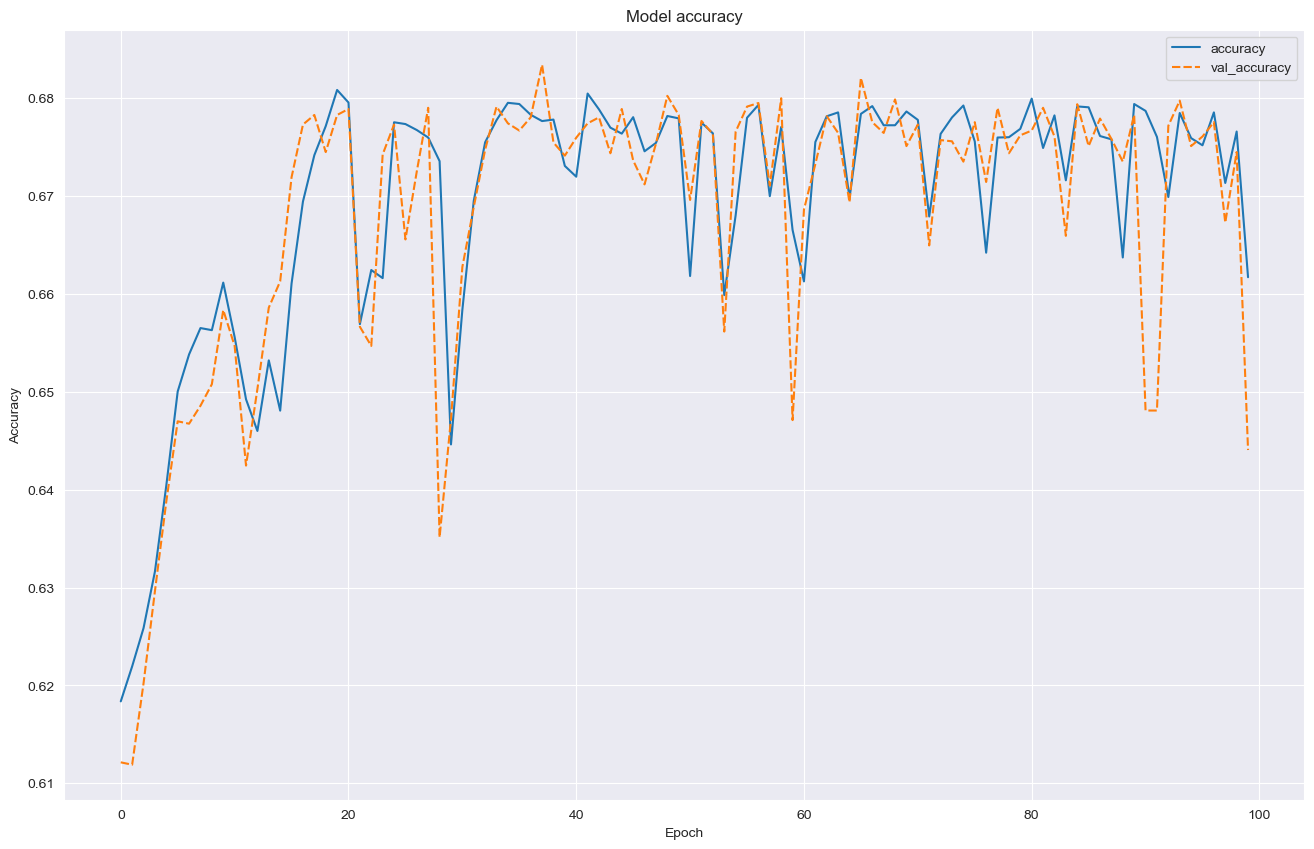

In [47]:
# Create a pandas DataFrame with "accuracy" and "Val accuracy" columns
data = pd.DataFrame({'accuracy': history5.history['accuracy'], 'val_accuracy': history5.history['val_accuracy']})

plt.figure(figsize=(16, 10))

sns.lineplot(data=data)

plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.show()

In [48]:
model6 = Sequential()

model6.add(Dense(8, input_dim=XTRAIN.shape[1], activation = "relu"))
model6.add(Dense(4, activation = "relu"))
model6.add(Dense(1, activation = "sigmoid"))

In [49]:
XTRAIN.shape, XVALIDATION.shape

((32726, 10), (8181, 10))

In [50]:
model6.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

# Define checkpoint callback
checkpoint_callback = ModelCheckpoint("best_model_1.hdf5", monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [51]:
history6 = model6.fit(XTRAIN, YTRAIN, epochs=100, validation_data=(XVALIDATION, YVALIDATION), callbacks=[checkpoint_callback])

Epoch 1/100
 997/1023 [============================>.] - ETA: 0s - loss: 0.6372 - accuracy: 0.6592
Epoch 1: val_loss improved from inf to 0.60248, saving model to best_model_1.hdf5
1023/1023 [==============================] - 2s 2ms/step - loss: 0.6364 - accuracy: 0.6602 - val_loss: 0.6025 - val_accuracy: 0.6965
Epoch 2/100
1018/1023 [============================>.] - ETA: 0s - loss: 0.5856 - accuracy: 0.7082
Epoch 2: val_loss improved from 0.60248 to 0.57639, saving model to best_model_1.hdf5
1023/1023 [==============================] - 1s 1ms/step - loss: 0.5856 - accuracy: 0.7082 - val_loss: 0.5764 - val_accuracy: 0.7054
Epoch 3/100
 997/1023 [============================>.] - ETA: 0s - loss: 0.5667 - accuracy: 0.7146
Epoch 3: val_loss improved from 0.57639 to 0.56533, saving model to best_model_1.hdf5
1023/1023 [==============================] - 2s 2ms/step - loss: 0.5663 - accuracy: 0.7149 - val_loss: 0.5653 - val_accuracy: 0.7108
Epoch 4/100
 976/1023 [===========================

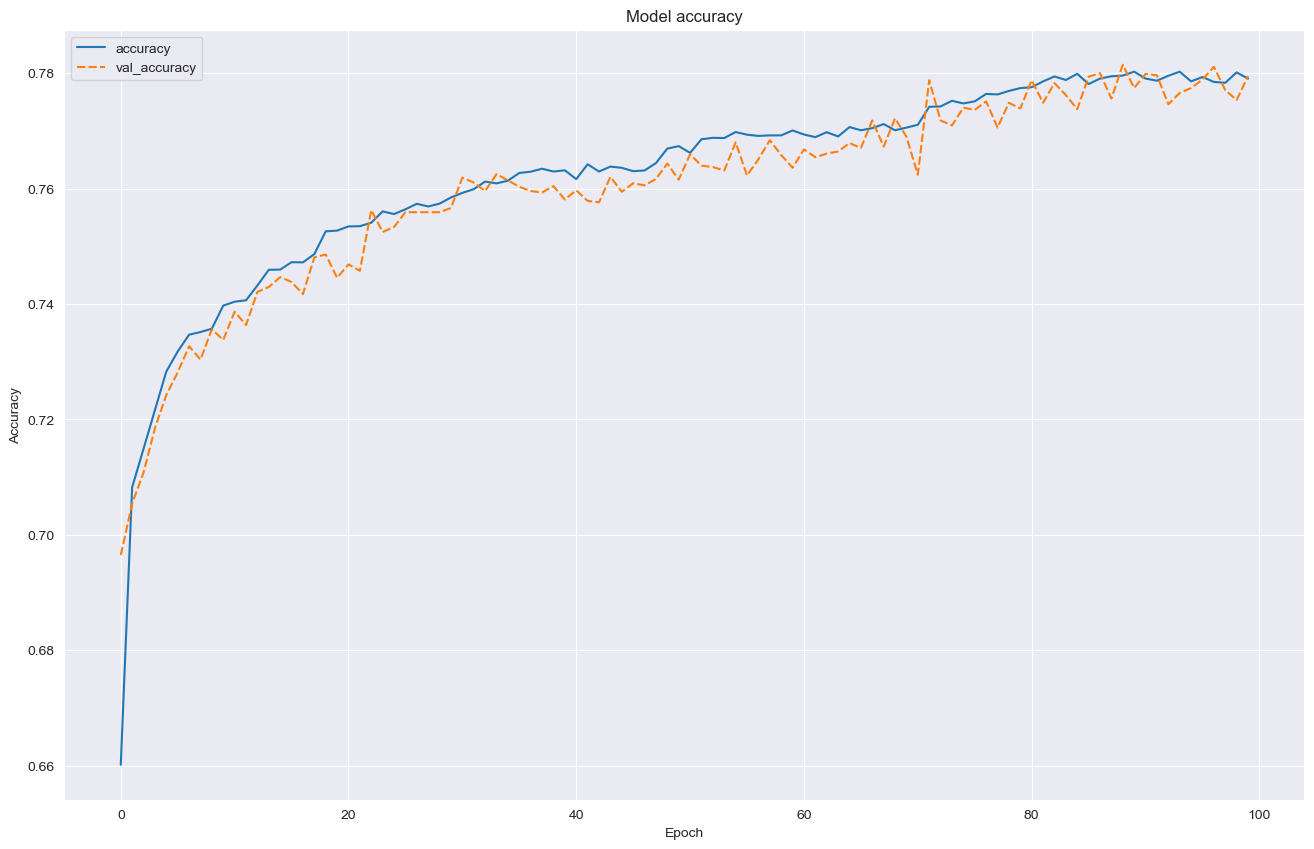

In [53]:
# Create a pandas DataFrame with "accuracy" and "Val accuracy" columns
data1 = pd.DataFrame({'accuracy': history6.history['accuracy'], 'val_accuracy': history6.history['val_accuracy']})

plt.figure(figsize=(16, 10))

sns.lineplot(data=data1)

plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.show()

In [54]:
model7 = Sequential()

model7.add(Dense(32, input_dim=XTRAIN.shape[1], activation = "relu"))
model7.add(Dense(16, activation = "relu"))
model7.add(Dense(8, activation = "relu"))
model7.add(Dense(1, activation = "sigmoid"))

In [55]:
model7.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

# Define checkpoint callback
checkpoint_callback = ModelCheckpoint("best_weights.hdf5", monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [56]:
history7 = model7.fit(XTRAIN, YTRAIN, epochs=100, validation_data=(XVALIDATION, YVALIDATION), callbacks=[checkpoint_callback])

Epoch 1/100
1012/1023 [============================>.] - ETA: 0s - loss: 0.5709 - accuracy: 0.6983
Epoch 1: val_loss improved from inf to 0.53655, saving model to best_weights.hdf5
1023/1023 [==============================] - 3s 2ms/step - loss: 0.5706 - accuracy: 0.6984 - val_loss: 0.5365 - val_accuracy: 0.7238
Epoch 2/100
 974/1023 [===========================>..] - ETA: 0s - loss: 0.5153 - accuracy: 0.7369
Epoch 2: val_loss improved from 0.53655 to 0.50521, saving model to best_weights.hdf5
1023/1023 [==============================] - 2s 2ms/step - loss: 0.5144 - accuracy: 0.7378 - val_loss: 0.5052 - val_accuracy: 0.7405
Epoch 3/100
1004/1023 [============================>.] - ETA: 0s - loss: 0.4845 - accuracy: 0.7601
Epoch 3: val_loss improved from 0.50521 to 0.48255, saving model to best_weights.hdf5
1023/1023 [==============================] - 2s 2ms/step - loss: 0.4840 - accuracy: 0.7609 - val_loss: 0.4826 - val_accuracy: 0.7585
Epoch 4/100
1021/1023 [===========================

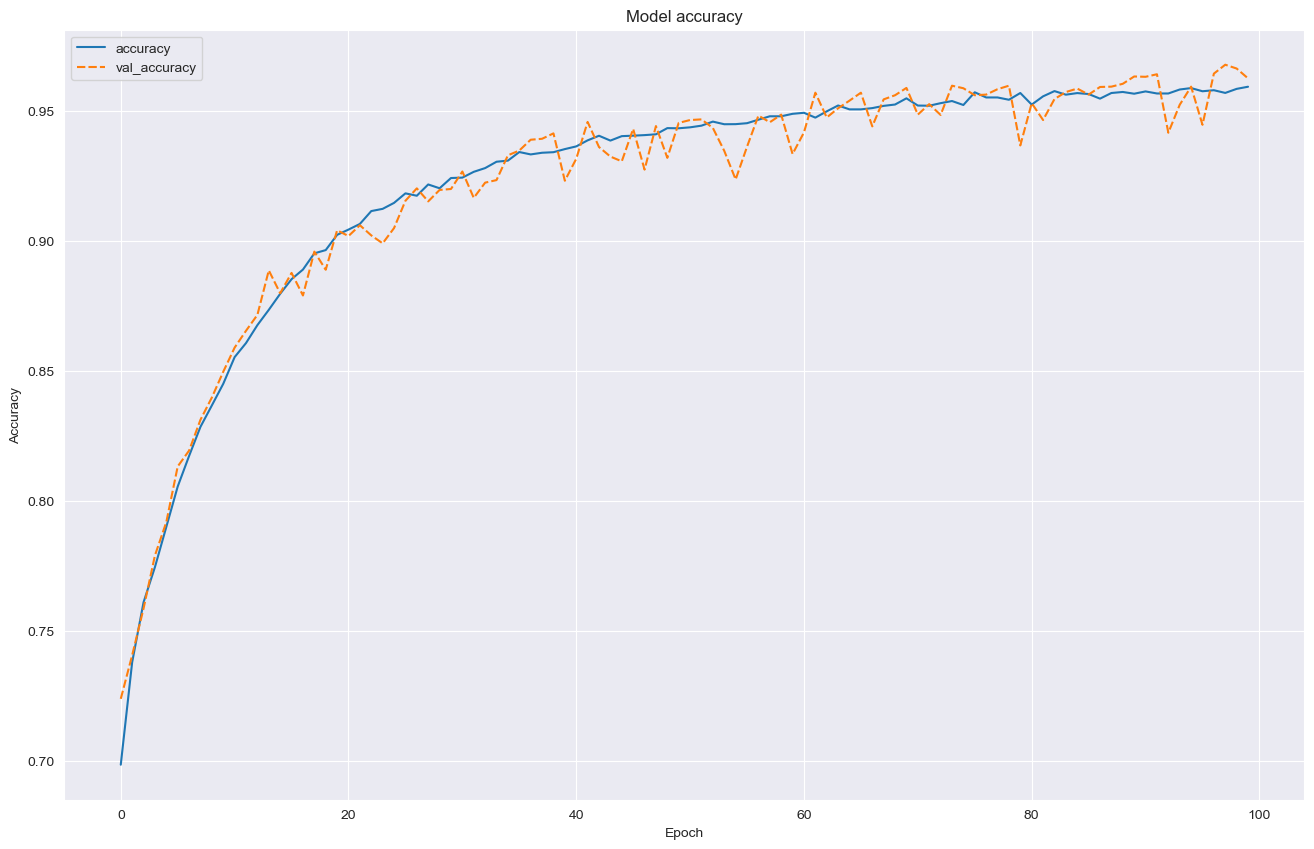

In [57]:
# Create a pandas DataFrame with "accuracy" and "Val accuracy" columns
data2 = pd.DataFrame({'accuracy': history7.history['accuracy'], 'val_accuracy': history7.history['val_accuracy']})

plt.figure(figsize=(16, 10))

sns.lineplot(data=data2)

plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.show()

In [58]:
model8 = Sequential()

model8.add(Dense(36, input_dim=XTRAIN.shape[1], activation = "relu"))
model8.add(Dense(18, activation = "relu"))
model8.add(Dense(8, activation = "relu"))
model8.add(Dense(1, activation = "sigmoid"))

In [59]:
model8.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

# Define checkpoint callback
checkpoint_callback = ModelCheckpoint("best_point.hdf5", monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [60]:
history8 = model8.fit(XTRAIN, YTRAIN, epochs=100, validation_data=(XVALIDATION, YVALIDATION), callbacks=[checkpoint_callback])

Epoch 1/100
 994/1023 [============================>.] - ETA: 0s - loss: 0.5741 - accuracy: 0.6998
Epoch 1: val_loss improved from inf to 0.54430, saving model to best_point.hdf5
1023/1023 [==============================] - 3s 2ms/step - loss: 0.5739 - accuracy: 0.6998 - val_loss: 0.5443 - val_accuracy: 0.7275
Epoch 2/100
 997/1023 [============================>.] - ETA: 0s - loss: 0.5186 - accuracy: 0.7399
Epoch 2: val_loss improved from 0.54430 to 0.50220, saving model to best_point.hdf5
1023/1023 [==============================] - 2s 2ms/step - loss: 0.5185 - accuracy: 0.7400 - val_loss: 0.5022 - val_accuracy: 0.7383
Epoch 3/100
1004/1023 [============================>.] - ETA: 0s - loss: 0.4858 - accuracy: 0.7578
Epoch 3: val_loss improved from 0.50220 to 0.47625, saving model to best_point.hdf5
1023/1023 [==============================] - 2s 2ms/step - loss: 0.4858 - accuracy: 0.7580 - val_loss: 0.4762 - val_accuracy: 0.7642
Epoch 4/100
 977/1023 [===========================>..] -

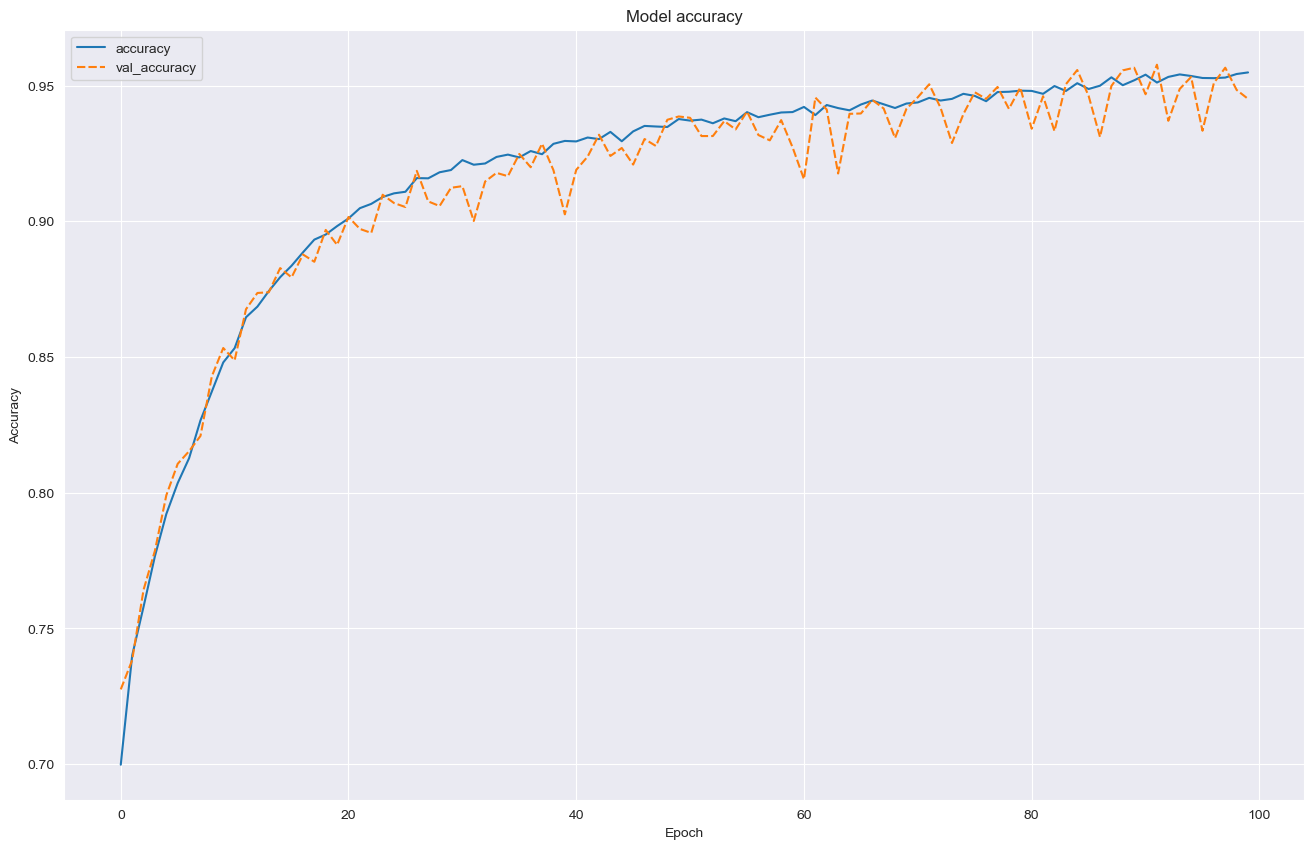

In [61]:
# Create a pandas DataFrame with "accuracy" and "Val accuracy" columns
data2 = pd.DataFrame({'accuracy': history8.history['accuracy'], 'val_accuracy': history8.history['val_accuracy']})

plt.figure(figsize=(16, 10))

sns.lineplot(data=data2)

plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.show()

In [62]:
model9 = Sequential()

model9.add(Dense(64, input_dim=XTRAIN.shape[1], activation = "tanh"))
model9.add(Dense(32, activation = "tanh"))
model9.add(Dense(16, activation = "tanh"))
model9.add(Dense(8, activation = "tanh"))
model9.add(Dense(1, activation = "sigmoid"))

In [63]:
model9.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

# Define checkpoint callback
checkpoint_callback = ModelCheckpoint("best_position.hdf5", monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [64]:
history9 = model9.fit(XTRAIN, YTRAIN, epochs=100, validation_data=(XVALIDATION, YVALIDATION), callbacks=[checkpoint_callback])

Epoch 1/100
1003/1023 [============================>.] - ETA: 0s - loss: 0.5826 - accuracy: 0.6948
Epoch 1: val_loss improved from inf to 0.55702, saving model to best_position.hdf5
1023/1023 [==============================] - 3s 2ms/step - loss: 0.5825 - accuracy: 0.6943 - val_loss: 0.5570 - val_accuracy: 0.6998
Epoch 2/100
1018/1023 [============================>.] - ETA: 0s - loss: 0.5351 - accuracy: 0.7284
Epoch 2: val_loss improved from 0.55702 to 0.51741, saving model to best_position.hdf5
1023/1023 [==============================] - 2s 2ms/step - loss: 0.5350 - accuracy: 0.7281 - val_loss: 0.5174 - val_accuracy: 0.7376
Epoch 3/100
 994/1023 [============================>.] - ETA: 0s - loss: 0.4975 - accuracy: 0.7547
Epoch 3: val_loss improved from 0.51741 to 0.48177, saving model to best_position.hdf5
1023/1023 [==============================] - 2s 2ms/step - loss: 0.4963 - accuracy: 0.7554 - val_loss: 0.4818 - val_accuracy: 0.7671
Epoch 4/100
 981/1023 [========================

In [65]:
accuracy_allFeatures = history9.history['val_accuracy'][99]
accuracy_allFeatures

0.9898545145988464

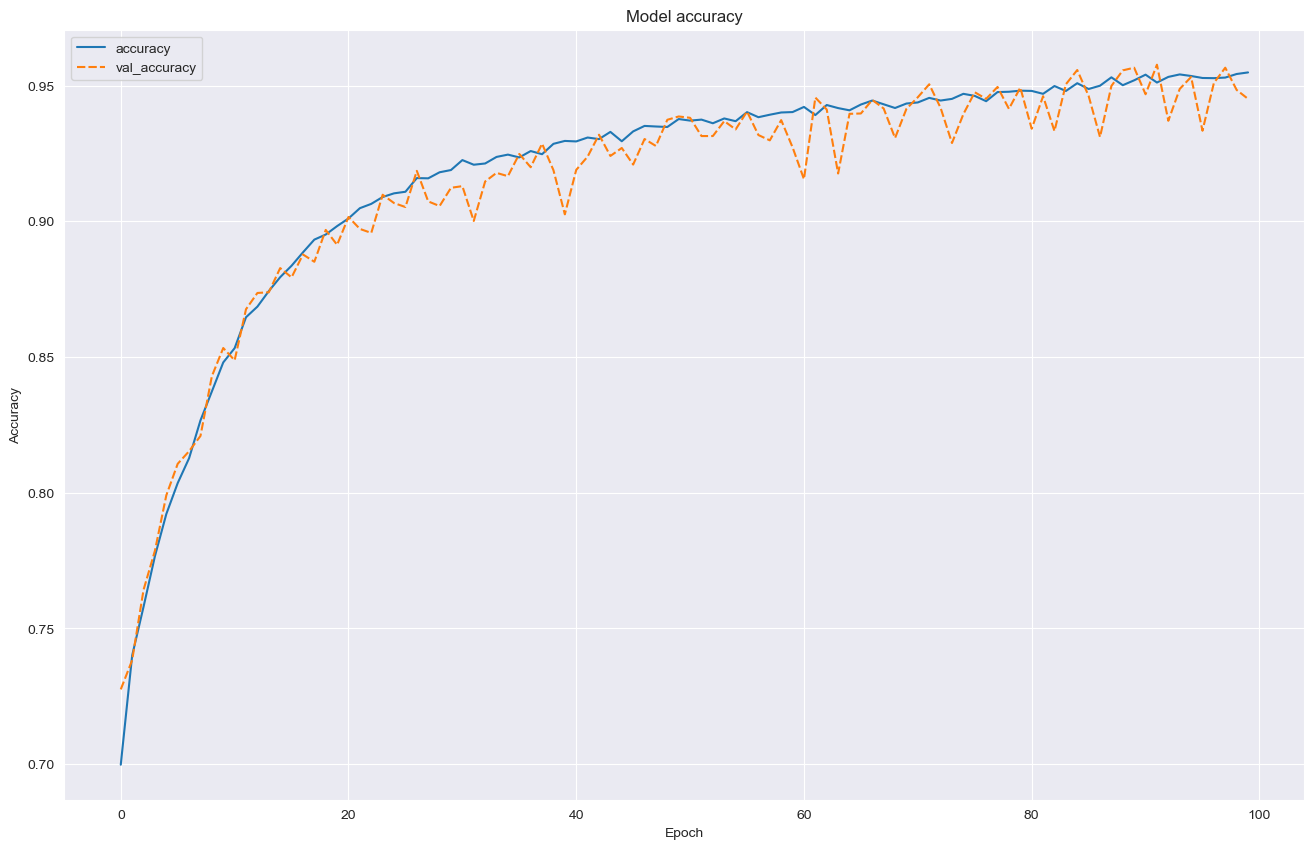

In [66]:
# Create a pandas DataFrame with "accuracy" and "Val accuracy" columns
data2 = pd.DataFrame({'accuracy': history8.history['accuracy'], 'val_accuracy': history8.history['val_accuracy']})

plt.figure(figsize=(16, 10))

sns.lineplot(data=data2)

plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.show()

<h5>Observation</h5><br>

<li>The above model of a training dataset gives the best accuracy of 98.97 at 100th epoch, which has 5 layers.</li>
<li>Input layer consists of 64 neurons and "tanh" as a activation function.</li>
<li>The other 3 Dense layers has 32,16 and 8 neurons respectively with activation function "tanh".
Output layer has single neuron with activation function "sigmoid"
    
Sticking with the accuracy as there is no further improvement.

<h2>Phase 4: Feature importance and reduction</h2>

In [486]:
model9.load_weights("best_position.hdf5")

In [552]:
df.shape

(40907, 11)

In [725]:
from sklearn import metrics

# def train_model(feature_index):
#     # Create the model
#     single_feature_model = Sequential()
    
#     single_feature_model.add(Dense(12, input_dim=1, activation='relu'))
#     single_feature_model.add(Dense(8, activation='relu'))
#     single_feature_model.add(Dense(1, activation='sigmoid'))

#     # Compile the model
#     single_feature_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# #     Define the checkpoint callback
#     checkpoint_path = f"model_checkpoint/feature_{feature_index}.hdf5"
#     checkpoint_callback = ModelCheckpoint("Best_Weights", monitor='val_loss', save_best_only=True, save_weights_only=True, verbose=1, mode="min")

#     # Train the model
#     history = single_feature_model.fit(XTRAIN[:, feature_index], YTRAIN, validation_data=(XVALIDATION[:, feature_index], YVALIDATION), epochs=100, callbacks=[checkpoint_callback])

#     # Load the best model weights
# #     single_feature_model.load_weights(checkpoint_path)

#     # Evaluate the model on the validation set
#     _, accuracy = single_feature_model.evaluate(X[:, feature_index], y, verbose=0)
#     return accuracy


def feature_importance():
    # Let's initialize the list to store the feature wise accuracy
    feature_accuracy = {}

    for index in range(XTRAIN.shape[1]):
        # Let's get the values corresponding to the each feature
        single_input_feature = XTRAIN[:, index]
        valid_input_feature = XVALIDATION[:, index]

        single_feature_model = Sequential()
        single_feature_model.add(Dense(64, input_dim=1, activation="tanh"))
        single_feature_model.add(Dense(32, input_dim=1, activation="tanh"))
        single_feature_model.add(Dense(16, input_dim=1, activation="tanh"))
        single_feature_model.add(Dense(8, input_dim=1, activation="tanh"))
        single_feature_model.add(Dense(1, activation="sigmoid"))

        # Let's build the model using binary_crossentropy as the loss function 
        # and accuracy as the evaluation metric during the compilation process
        single_feature_model.compile(loss="binary_crossentropy", optimizer = "adam", metrics=["accuracy"])

        callback_a = ModelCheckpoint("model_feature1.hdf5", monitor="val_loss", save_best_only=True, save_weights_only=True, verbose=0)
#         callback_b = EarlyStopping(monitor="val_loss", mode="min", patience=20, verbose=0)

        print(f"Let's fit the sequential model on {df.columns[index]}")
        # Let's fit the sequential model with input features and output label
        history = single_feature_model.fit(
            x=single_input_feature, 
            y=YTRAIN, 
            validation_data=(valid_input_feature, YVALIDATION), 
            epochs=100, 
            batch_size=100, 
            callbacks=[callback_a], 
            verbose=0
        )
        # Let's precit on the validation inputs
        hypothesis = single_feature_model.predict(valid_input_feature, verbose=0)
        hypothesis = (hypothesis > 0.5)
        accuracy_score = metrics.accuracy_score(YVALIDATION, hypothesis)
        feature_accuracy[df.columns[index]] = accuracy_score

        print(f"Accuracy score corresponding to {df.columns[index]} --> {accuracy_score}")
        print()
    return feature_accuracy



In [726]:
# Let's call the feature_importance function to calulate the importance of each feature
feature_accuracy = feature_importance()

# Let's print the feature_accuracy dictionary
feature_accuracy

Let's fit the sequential model on sex
Accuracy score corresponding to sex --> 0.5619117467302286

Let's fit the sequential model on age
Accuracy score corresponding to age --> 0.568634641241902

Let's fit the sequential model on hypertension
Accuracy score corresponding to hypertension --> 0.6114166972252781

Let's fit the sequential model on heart_disease
Accuracy score corresponding to heart_disease --> 0.5833027747219166

Let's fit the sequential model on ever_married
Accuracy score corresponding to ever_married --> 0.5655787801002322

Let's fit the sequential model on work_type
Accuracy score corresponding to work_type --> 0.5467546754675467

Let's fit the sequential model on Residence_type
Accuracy score corresponding to Residence_type --> 0.4999388827771666

Let's fit the sequential model on avg_glucose_level
Accuracy score corresponding to avg_glucose_level --> 0.6475980931426476

Let's fit the sequential model on bmi
Accuracy score corresponding to bmi --> 0.6231512040092898

L

{'sex': 0.5619117467302286,
 'age': 0.568634641241902,
 'hypertension': 0.6114166972252781,
 'heart_disease': 0.5833027747219166,
 'ever_married': 0.5655787801002322,
 'work_type': 0.5467546754675467,
 'Residence_type': 0.4999388827771666,
 'avg_glucose_level': 0.6475980931426476,
 'bmi': 0.6231512040092898,
 'smoking_status': 0.5306197286395307}

{'Residence_type': 0.4999388827771666, 'smoking_status': 0.5306197286395307, 'work_type': 0.5467546754675467, 'sex': 0.5619117467302286, 'ever_married': 0.5655787801002322, 'age': 0.568634641241902, 'heart_disease': 0.5833027747219166, 'hypertension': 0.6114166972252781, 'bmi': 0.6231512040092898, 'avg_glucose_level': 0.6475980931426476}
['Residence_type' 'smoking_status' 'work_type' 'sex' 'ever_married' 'age'
 'heart_disease' 'hypertension' 'bmi' 'avg_glucose_level']


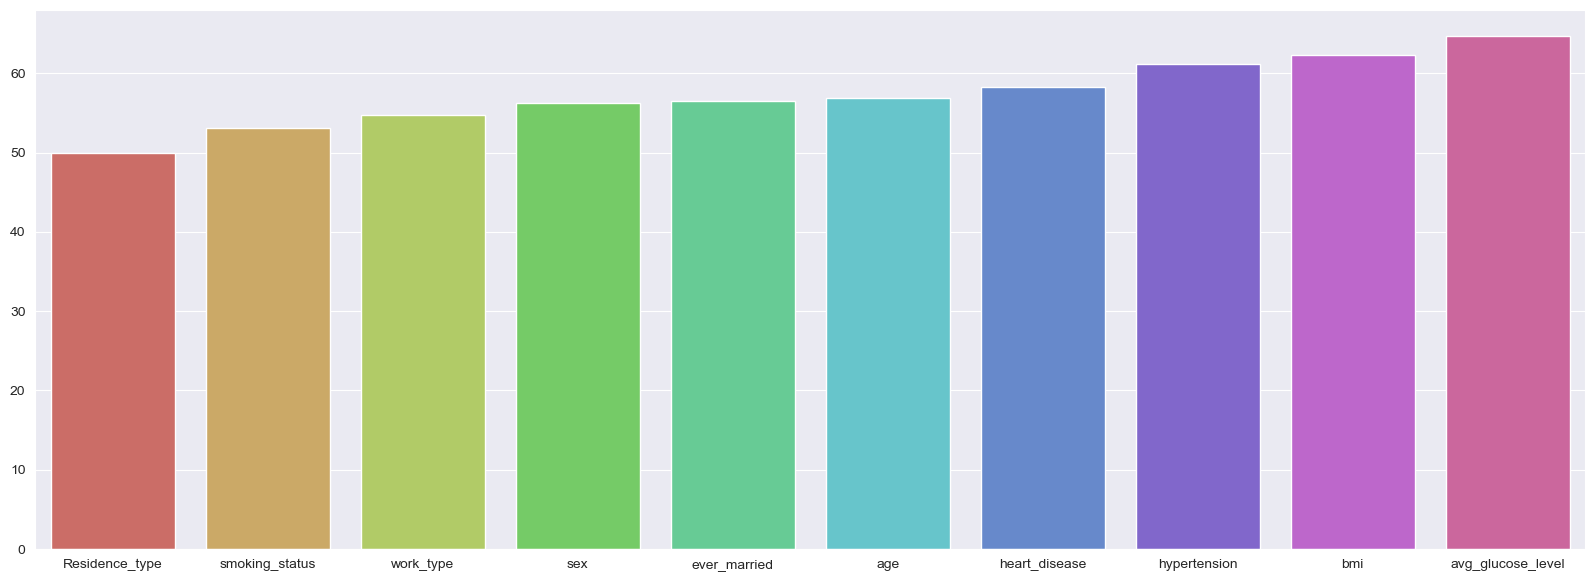

In [765]:
# Let's plot the barchart of different features on
# X-axis and corresponding accuracies on y-axis

sorted_feature_accuracy = {key: value for key, value in sorted(feature_accuracy.items(), key=lambda item: item[1])}
print(sorted_feature_accuracy)
sorted_features = np.array(list(sorted_feature_accuracy.keys()))
print(sorted_features)
plt.figure(figsize=(20, 7))

# Let's convert the acuuracies into percentages
feature_acc = np.array(list(sorted_feature_accuracy.values())) * 100

sns.barplot(x=list(sorted_feature_accuracy.keys()), y=feature_acc, palette="hls")
plt.show()

In [621]:
list(df.columns.values)

['sex',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke']

In [816]:
# Load dataset
df = pd.read_csv('stroke_data.csv', delimiter = ',')
print(df.shape)
df.head(10)
train_df = pd.DataFrame(XTRAIN, columns=df.columns.tolist()[:-1])
valid_df = pd.DataFrame(XVALIDATION, columns=df.columns.tolist()[:-1])

(40910, 11)


In [818]:
def feature_importance_and_reduction():
    accuracy_after_each_reduction = []
    Val_accuracy_after_each_reduction = []
    for index, feature in enumerate(sorted_features):
        
        if index == len(sorted_features):
            break
        train_df.drop(feature, axis=1, inplace=True)
        valid_df.drop(feature, axis=1, inplace=True)
        model_1 = Sequential()
        model_1.add(Dense(64, input_dim=train_df.shape[1], activation = "tanh"))
        model_1.add(Dense(32, activation = "tanh"))
        model_1.add(Dense(16, activation = "tanh"))
        model_1.add(Dense(8, activation = "tanh"))
        model_1.add(Dense(1, activation = "sigmoid"))
        
        model_1.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

        # Define checkpoint callback
        checkpoint_callback = ModelCheckpoint("best_of_weights.hdf5", monitor='val_loss', verbose=1, save_best_only=True, mode='min')
        history_1 = model_1.fit(train_df.values, YTRAIN, epochs=100, validation_data=(valid_df.values, YVALIDATION), callbacks=[checkpoint_callback])
        
        accuracy_after_each_reduction.append({feature: history_1.history['accuracy']})
        Val_accuracy_after_each_reduction.append({feature: history_1.history['val_accuracy']})
        
    return accuracy_after_each_reduction, Val_accuracy_after_each_reduction
        

In [819]:
accuracy_data, Val_accuracy_data = feature_importance_and_reduction()

Epoch 1/100
1017/1023 [============================>.] - ETA: 0s - loss: 0.5808 - accuracy: 0.6995
Epoch 1: val_loss improved from inf to 0.55462, saving model to best_of_weights.hdf5
1023/1023 [==============================] - 8s 6ms/step - loss: 0.5806 - accuracy: 0.6995 - val_loss: 0.5546 - val_accuracy: 0.7026
Epoch 2/100
1017/1023 [============================>.] - ETA: 0s - loss: 0.5362 - accuracy: 0.7310
Epoch 2: val_loss improved from 0.55462 to 0.51413, saving model to best_of_weights.hdf5
1023/1023 [==============================] - 4s 4ms/step - loss: 0.5359 - accuracy: 0.7313 - val_loss: 0.5141 - val_accuracy: 0.7497
Epoch 3/100
1022/1023 [============================>.] - ETA: 0s - loss: 0.5044 - accuracy: 0.7565
Epoch 3: val_loss improved from 0.51413 to 0.48523, saving model to best_of_weights.hdf5
1023/1023 [==============================] - 4s 4ms/step - loss: 0.5043 - accuracy: 0.7566 - val_loss: 0.4852 - val_accuracy: 0.7698
Epoch 4/100
1016/1023 [==================

In [822]:
print("Accuracy")
for feature in accuracy_data:
    feature_name = list(feature.keys())[0]
    accu = feature[feature_name]
    last_accuracy = accu[-1]
    print(f"{feature_name}: {last_accuracy}")
    
print()
print("Val Accuracy")
last_Val_accuracy = []
for feature in Val_accuracy_data:
    feature_name = list(feature.keys())[0]
    accu = feature[feature_name]
    last_accuracy = accu[-1]
    last_Val_accuracy.append({f"Accuracy Removing {key}": accu})
    print(f"{feature_name}: {last_accuracy}")
    

Accuracy
Residence_type: 0.9841716289520264
smoking_status: 0.9713072180747986
work_type: 0.9265415668487549
sex: 0.9347002506256104
ever_married: 0.9202163219451904
age: 0.9089714884757996
heart_disease: 0.9038990139961243
hypertension: 0.7802664637565613
bmi: 0.6283383369445801
avg_glucose_level: 0.4972193241119385

Val Accuracy
Residence_type: 0.9826427102088928
smoking_status: 0.9574624300003052
work_type: 0.9315487146377563
sex: 0.9309375286102295
ever_married: 0.916024923324585
age: 0.902945876121521
heart_disease: 0.9179806709289551
hypertension: 0.7708104252815247
bmi: 0.6273071765899658
avg_glucose_level: 0.49651631712913513


In [668]:
XTRAIN_dataframe = pd.DataFrame(XTRAIN)
XVALIDATION_dataframe = pd.DataFrame(XVALIDATION)

In [689]:
list(XTRAIN_dataframe.columns.values)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [669]:
XVALIDATION_dataframe.head(10)

,0,1,2,3,4,5,6,7,8,9
0,-1.117129,1.742157,-0.521552,-0.382660,0.466409,-0.590440,-1.030143,-0.794617,-0.878745,1.023112
1,0.895130,0.216087,-0.521552,-0.382660,0.466409,0.690078,-1.030143,-0.745278,3.276154,1.023112
2,0.895130,0.493554,-0.521552,-0.382660,-2.143988,0.690078,0.970715,-0.570858,1.081665,-0.977387
3,0.895130,1.233467,-0.521552,-0.382660,0.466409,-1.870959,-1.030143,-1.108018,-1.463942,-0.977387
4,-1.117129,-0.153870,-0.521552,-0.382660,0.466409,0.690078,0.970715,-0.257456,1.198705,1.023112
5,-1.117129,1.048489,-0.521552,-0.382660,0.466409,0.690078,-1.030143,-1.006562,-0.147248,-0.977387
6,0.895130,0.123598,-0.521552,2.613221,0.466409,0.690078,-1.030143,1.901956,0.949996,-0.977387
7,0.895130,-0.015136,-0.521552,-0.382660,-2.143988,-0.590440,0.970715,-0.691423,-0.937264,1.023112
8,0.895130,0.123598,-0.521552,-0.382660,0.466409,-0.590440,0.970715,1.020124,-1.478572,-0.977387
9,-1.117129,-1.818673,-0.521552,2.613221,0.466409,0.690078,-1.030143,-1.089777,0.277019,1.023112


In [670]:
XTRAIN_column_1 = XTRAIN_dataframe.drop(columns = 6, axis = 1)

In [671]:
XVALIDATION_column_1 = XVALIDATION_dataframe.drop(columns = 6, axis = 1)

In [692]:
XTRAIN_column_1.head(10)

,0,1,2,3,4,5,7,8,9
0,0.895130,1.048489,-0.521552,-0.382660,0.466409,0.690078,1.818047,1.944831,-0.977387
1,0.895130,-0.940027,-0.521552,-0.382660,0.466409,0.690078,1.096042,1.462043,1.023112
2,-1.117129,1.788401,-0.521552,-0.382660,-2.143988,0.690078,-0.576069,-1.098193,-0.977387
3,-1.117129,-0.801293,-0.521552,-0.382660,0.466409,0.690078,-0.717830,-0.235028,1.023112
4,0.895130,1.418445,-0.521552,-0.382660,0.466409,0.690078,-0.915182,2.544658,-0.977387
5,0.895130,-1.679940,1.917307,2.613221,0.466409,0.690078,0.492866,2.061870,1.023112
6,0.895130,-0.801293,-0.521552,-0.382660,-2.143988,0.690078,-0.244948,-0.512997,-0.977387
7,-1.117129,-1.402472,-0.521552,-0.382660,0.466409,-0.590440,-0.351442,-0.776335,1.023112
8,0.895130,-0.246359,-0.521552,-0.382660,0.466409,0.690078,-0.812858,-1.142083,1.023112
9,0.895130,-0.477581,1.917307,-0.382660,0.466409,-0.590440,0.904075,-0.937264,-0.977387


In [675]:
XVALIDATION_column_1.shape

(8181, 9)

In [683]:
model_1 = Sequential()

model_1.add(Dense(64, input_dim=XTRAIN_column_1.shape[1], activation = "tanh"))
model_1.add(Dense(32, activation = "tanh"))
model_1.add(Dense(16, activation = "tanh"))
model_1.add(Dense(8, activation = "tanh"))
model_1.add(Dense(1, activation = "sigmoid"))

In [684]:
model_1.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

# Define checkpoint callback
checkpoint_callback = ModelCheckpoint("best_of_weights.hdf5", monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [685]:
history_1 = model_1.fit(XTRAIN_column_1, YTRAIN, epochs=100, validation_data=(XVALIDATION_column_1, YVALIDATION), callbacks=[checkpoint_callback])

Epoch 1/100
1014/1023 [============================>.] - ETA: 0s - loss: 0.5856 - accuracy: 0.6979
Epoch 1: val_loss improved from inf to 0.55625, saving model to best_of_weights.hdf5
1023/1023 [==============================] - 6s 4ms/step - loss: 0.5855 - accuracy: 0.6979 - val_loss: 0.5563 - val_accuracy: 0.7178
Epoch 2/100
1019/1023 [============================>.] - ETA: 0s - loss: 0.5417 - accuracy: 0.7280
Epoch 2: val_loss improved from 0.55625 to 0.52336, saving model to best_of_weights.hdf5
1023/1023 [==============================] - 4s 4ms/step - loss: 0.5416 - accuracy: 0.7280 - val_loss: 0.5234 - val_accuracy: 0.7388
Epoch 3/100
1009/1023 [============================>.] - ETA: 0s - loss: 0.5041 - accuracy: 0.7575
Epoch 3: val_loss improved from 0.52336 to 0.48161, saving model to best_of_weights.hdf5
1023/1023 [==============================] - 4s 4ms/step - loss: 0.5040 - accuracy: 0.7574 - val_loss: 0.4816 - val_accuracy: 0.7681
Epoch 4/100
1010/1023 [==================

In [749]:
accuracy_excludingResidence = history_1.history['val_accuracy'][99]
accuracy_excludingResidence

0.9852096438407898

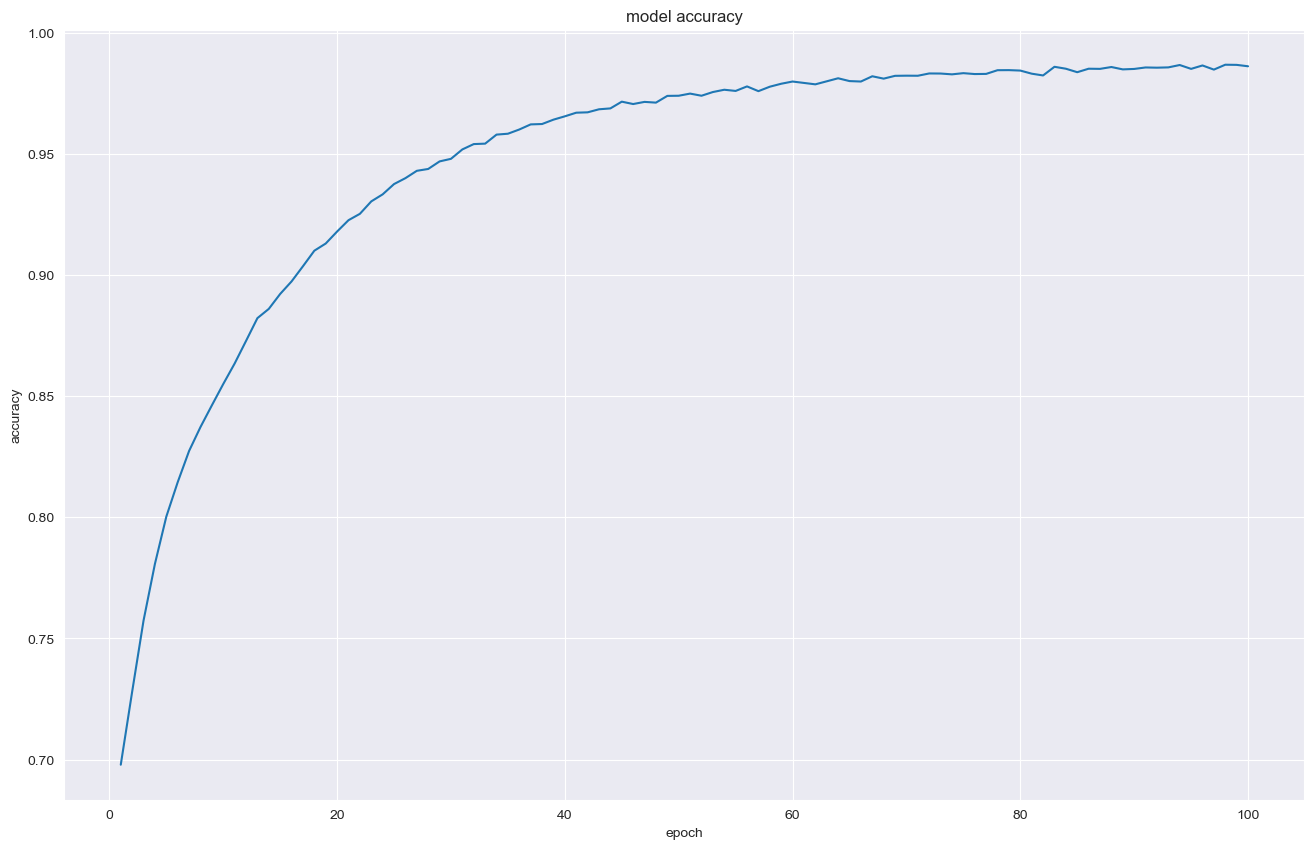

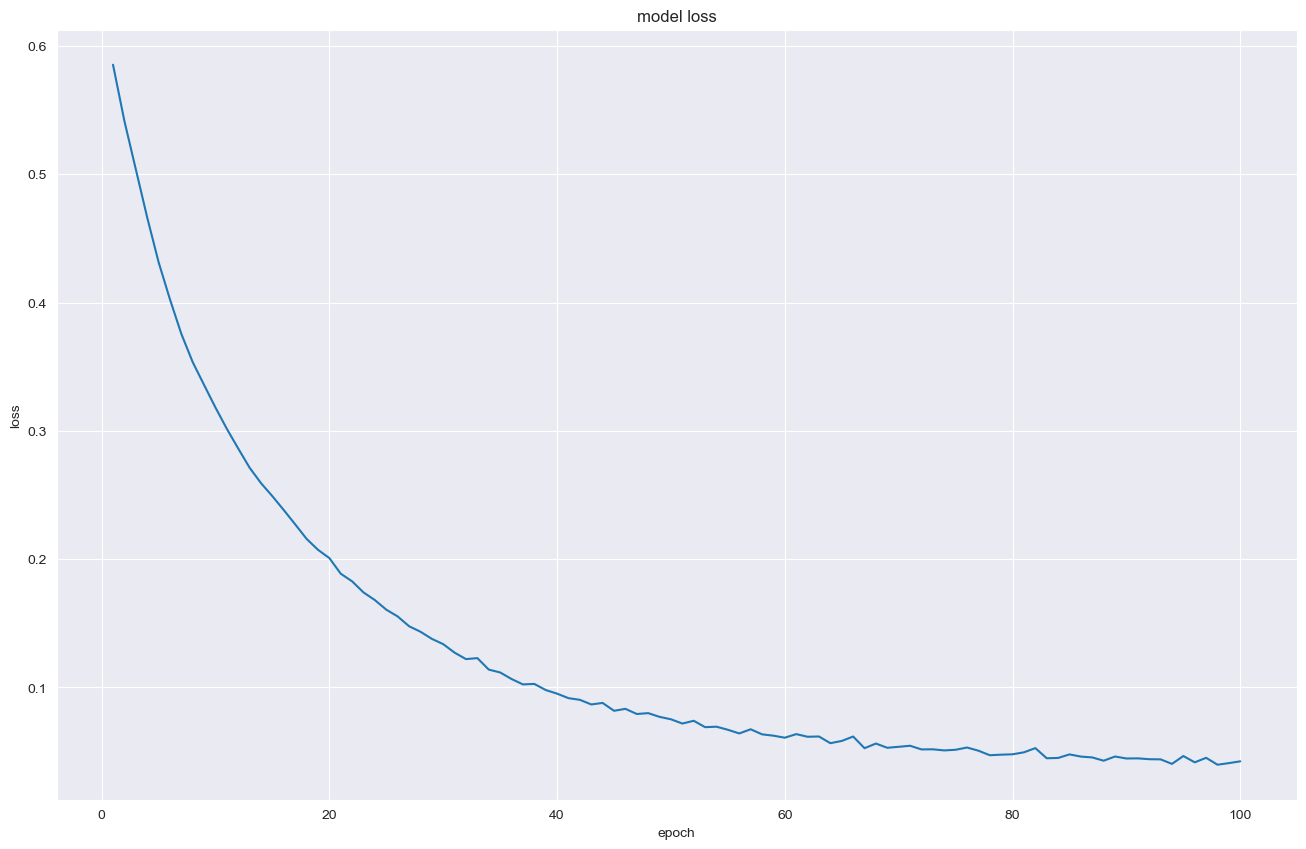

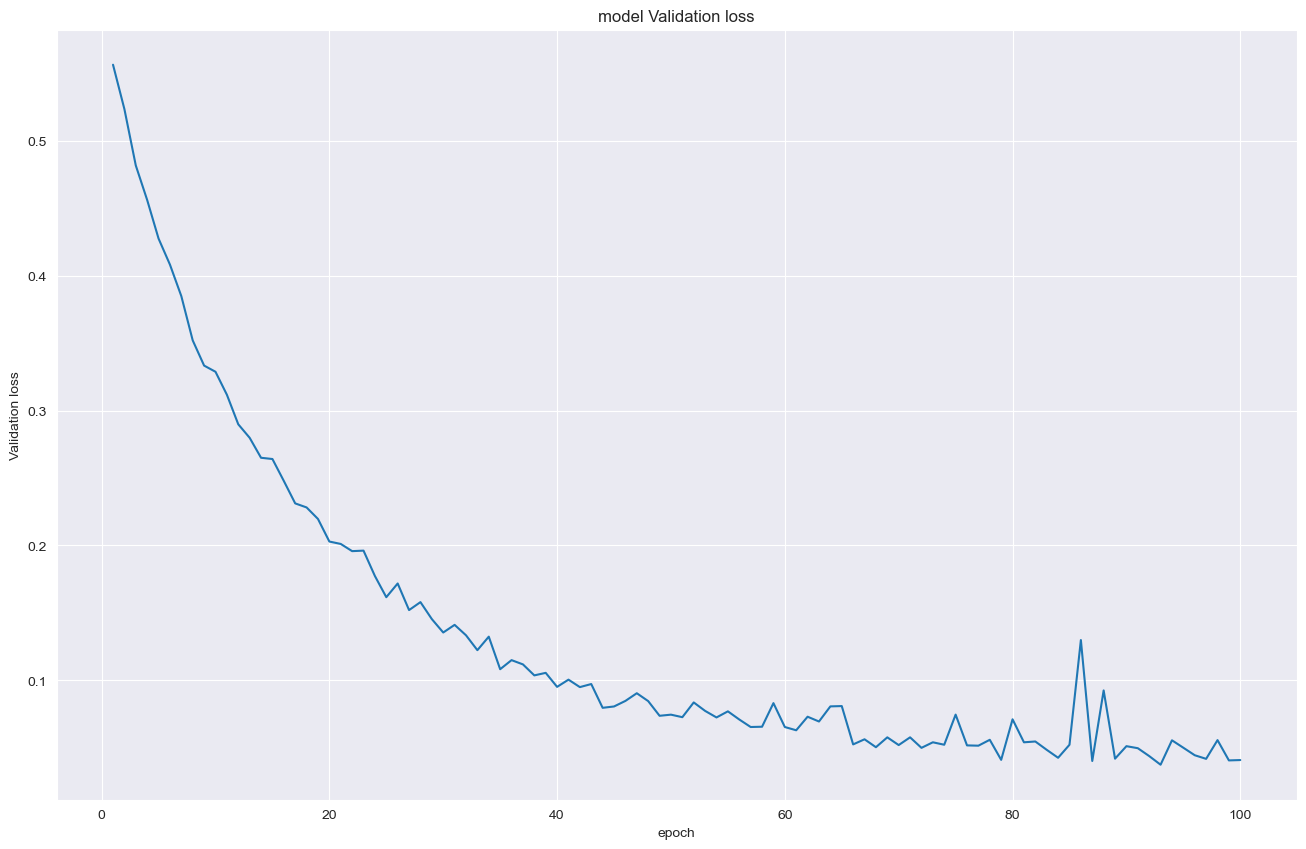

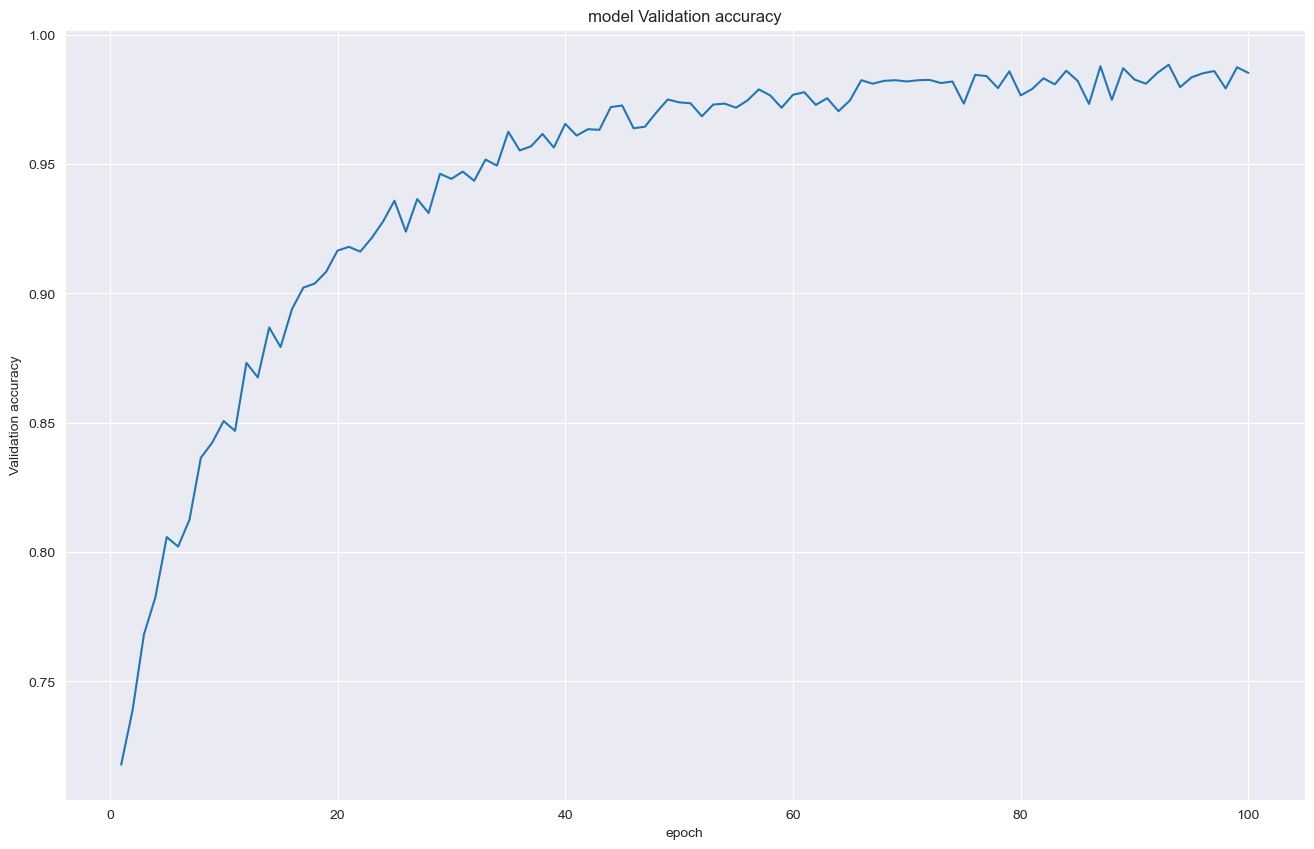

In [735]:

plt.figure(figsize=(16, 10))

sns.lineplot(x=x1, y=history_1.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.figure(figsize=(16, 10))

sns.lineplot(x=x1, y=history_1.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

plt.figure(figsize=(16, 10))

sns.lineplot(x=x1, y=history_1.history['val_loss'])
plt.title('model Validation loss')
plt.ylabel('Validation loss')
plt.xlabel('epoch')
plt.show()

plt.figure(figsize=(16, 10))

sns.lineplot(x=x1, y=history_1.history['val_accuracy'])
plt.title('model Validation accuracy')
plt.ylabel('Validation accuracy')
plt.xlabel('epoch')
plt.show()

In [686]:
XTRAIN_column_2 = XTRAIN_dataframe.drop(columns = [6, 9], axis = 1)

In [688]:
XTRAIN_column_2.head(10)

,0,1,2,3,4,5,7,8
0,0.895130,1.048489,-0.521552,-0.382660,0.466409,0.690078,1.818047,1.944831
1,0.895130,-0.940027,-0.521552,-0.382660,0.466409,0.690078,1.096042,1.462043
2,-1.117129,1.788401,-0.521552,-0.382660,-2.143988,0.690078,-0.576069,-1.098193
3,-1.117129,-0.801293,-0.521552,-0.382660,0.466409,0.690078,-0.717830,-0.235028
4,0.895130,1.418445,-0.521552,-0.382660,0.466409,0.690078,-0.915182,2.544658
5,0.895130,-1.679940,1.917307,2.613221,0.466409,0.690078,0.492866,2.061870
6,0.895130,-0.801293,-0.521552,-0.382660,-2.143988,0.690078,-0.244948,-0.512997
7,-1.117129,-1.402472,-0.521552,-0.382660,0.466409,-0.590440,-0.351442,-0.776335
8,0.895130,-0.246359,-0.521552,-0.382660,0.466409,0.690078,-0.812858,-1.142083
9,0.895130,-0.477581,1.917307,-0.382660,0.466409,-0.590440,0.904075,-0.937264


In [690]:
XVALIDATION_column_2 = XVALIDATION_dataframe.drop(columns = [6, 9], axis = 1)

In [691]:
XVALIDATION_column_2.head(10)

,0,1,2,3,4,5,7,8
0,-1.117129,1.742157,-0.521552,-0.382660,0.466409,-0.590440,-0.794617,-0.878745
1,0.895130,0.216087,-0.521552,-0.382660,0.466409,0.690078,-0.745278,3.276154
2,0.895130,0.493554,-0.521552,-0.382660,-2.143988,0.690078,-0.570858,1.081665
3,0.895130,1.233467,-0.521552,-0.382660,0.466409,-1.870959,-1.108018,-1.463942
4,-1.117129,-0.153870,-0.521552,-0.382660,0.466409,0.690078,-0.257456,1.198705
5,-1.117129,1.048489,-0.521552,-0.382660,0.466409,0.690078,-1.006562,-0.147248
6,0.895130,0.123598,-0.521552,2.613221,0.466409,0.690078,1.901956,0.949996
7,0.895130,-0.015136,-0.521552,-0.382660,-2.143988,-0.590440,-0.691423,-0.937264
8,0.895130,0.123598,-0.521552,-0.382660,0.466409,-0.590440,1.020124,-1.478572
9,-1.117129,-1.818673,-0.521552,2.613221,0.466409,0.690078,-1.089777,0.277019


In [693]:
model_2 = Sequential()

model_2.add(Dense(64, input_dim=XTRAIN_column_2.shape[1], activation = "tanh"))
model_2.add(Dense(32, activation = "tanh"))
model_2.add(Dense(16, activation = "tanh"))
model_2.add(Dense(8, activation = "tanh"))
model_2.add(Dense(1, activation = "sigmoid"))

In [694]:
model_2.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

# Define checkpoint callback
checkpoint_callback = ModelCheckpoint("best_of_points.hdf5", monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [695]:
history_2 = model_2.fit(XTRAIN_column_2, YTRAIN, epochs=100, validation_data=(XVALIDATION_column_2, YVALIDATION), callbacks=[checkpoint_callback])

Epoch 1/100
1017/1023 [============================>.] - ETA: 0s - loss: 0.5890 - accuracy: 0.6870
Epoch 1: val_loss improved from inf to 0.56673, saving model to best_of_points.hdf5
1023/1023 [==============================] - 8s 3ms/step - loss: 0.5891 - accuracy: 0.6871 - val_loss: 0.5667 - val_accuracy: 0.7079
Epoch 2/100
1015/1023 [============================>.] - ETA: 0s - loss: 0.5620 - accuracy: 0.7095
Epoch 2: val_loss improved from 0.56673 to 0.54689, saving model to best_of_points.hdf5
1023/1023 [==============================] - 3s 3ms/step - loss: 0.5615 - accuracy: 0.7100 - val_loss: 0.5469 - val_accuracy: 0.7202
Epoch 3/100
1010/1023 [============================>.] - ETA: 0s - loss: 0.5480 - accuracy: 0.7156
Epoch 3: val_loss improved from 0.54689 to 0.54274, saving model to best_of_points.hdf5
1023/1023 [==============================] - 3s 3ms/step - loss: 0.5477 - accuracy: 0.7157 - val_loss: 0.5427 - val_accuracy: 0.7208
Epoch 4/100
1023/1023 [=====================

In [750]:
acc_excludingSmokingStatus = history_2.history['val_accuracy'][99]
acc_excludingSmokingStatus

0.9693191647529602

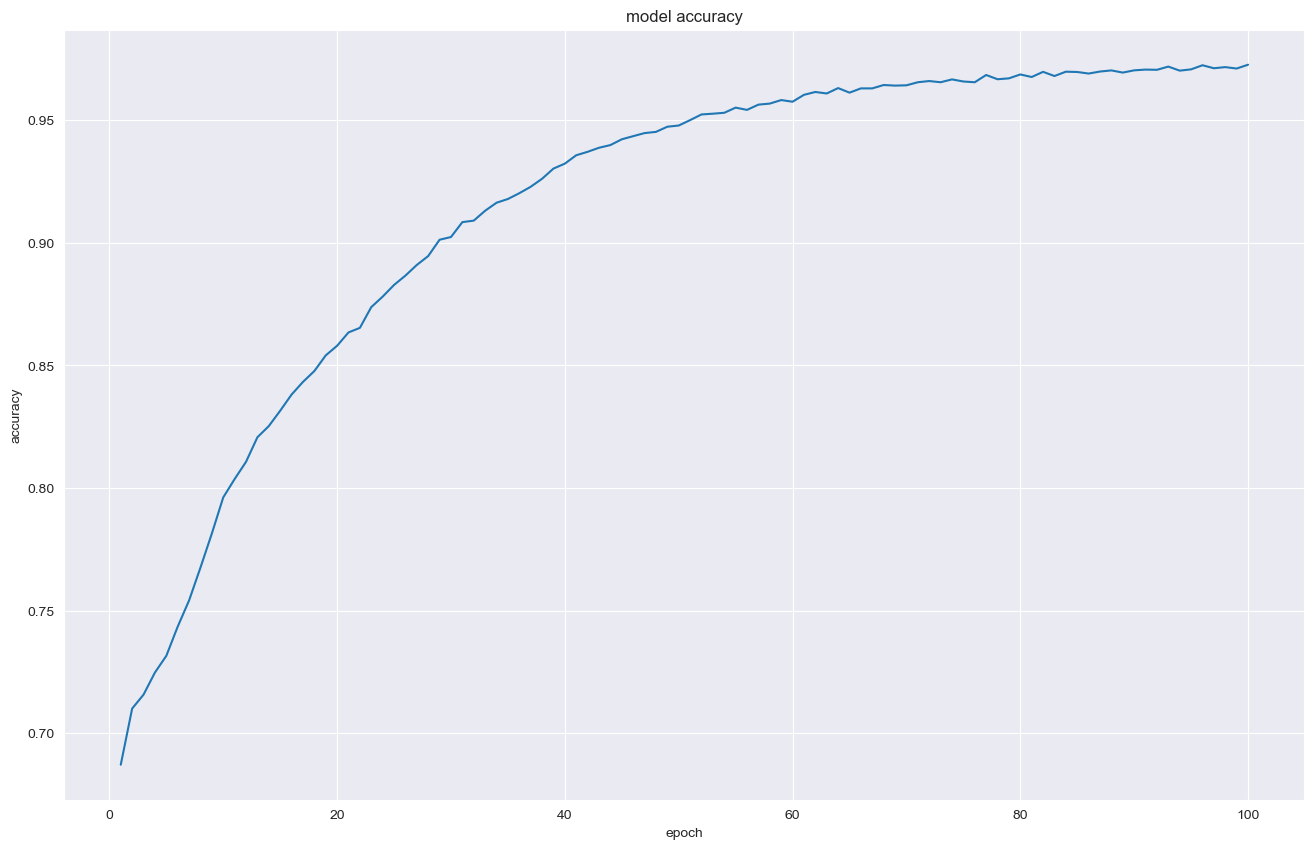

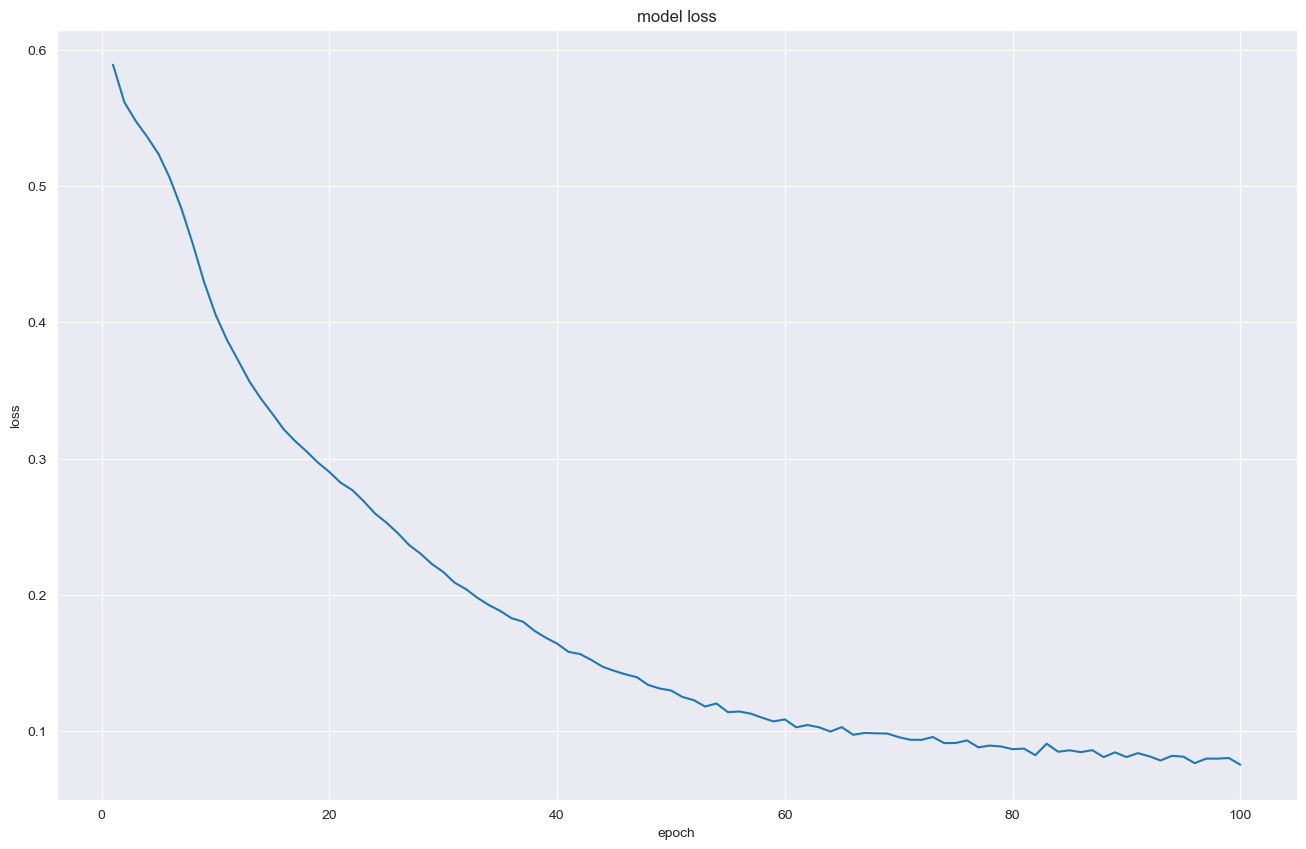

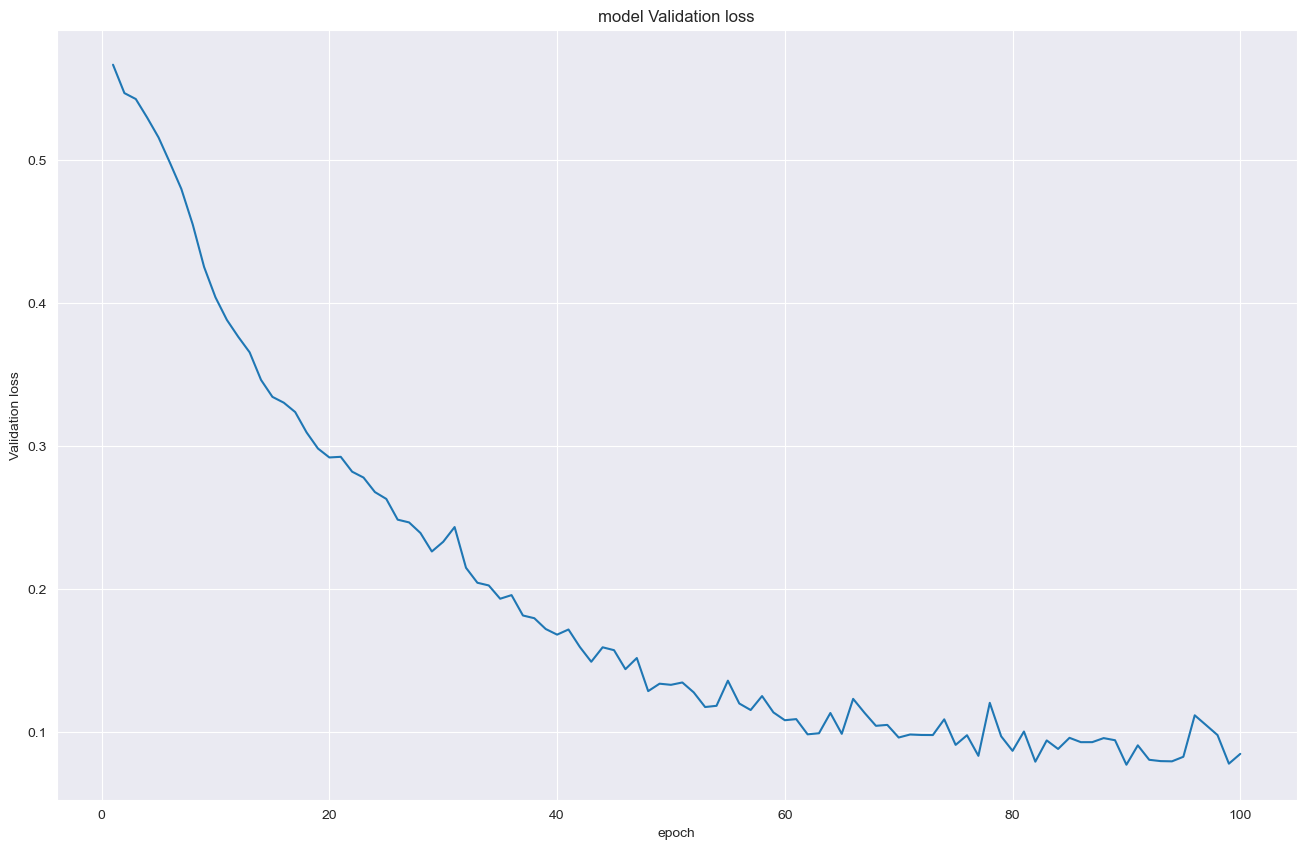

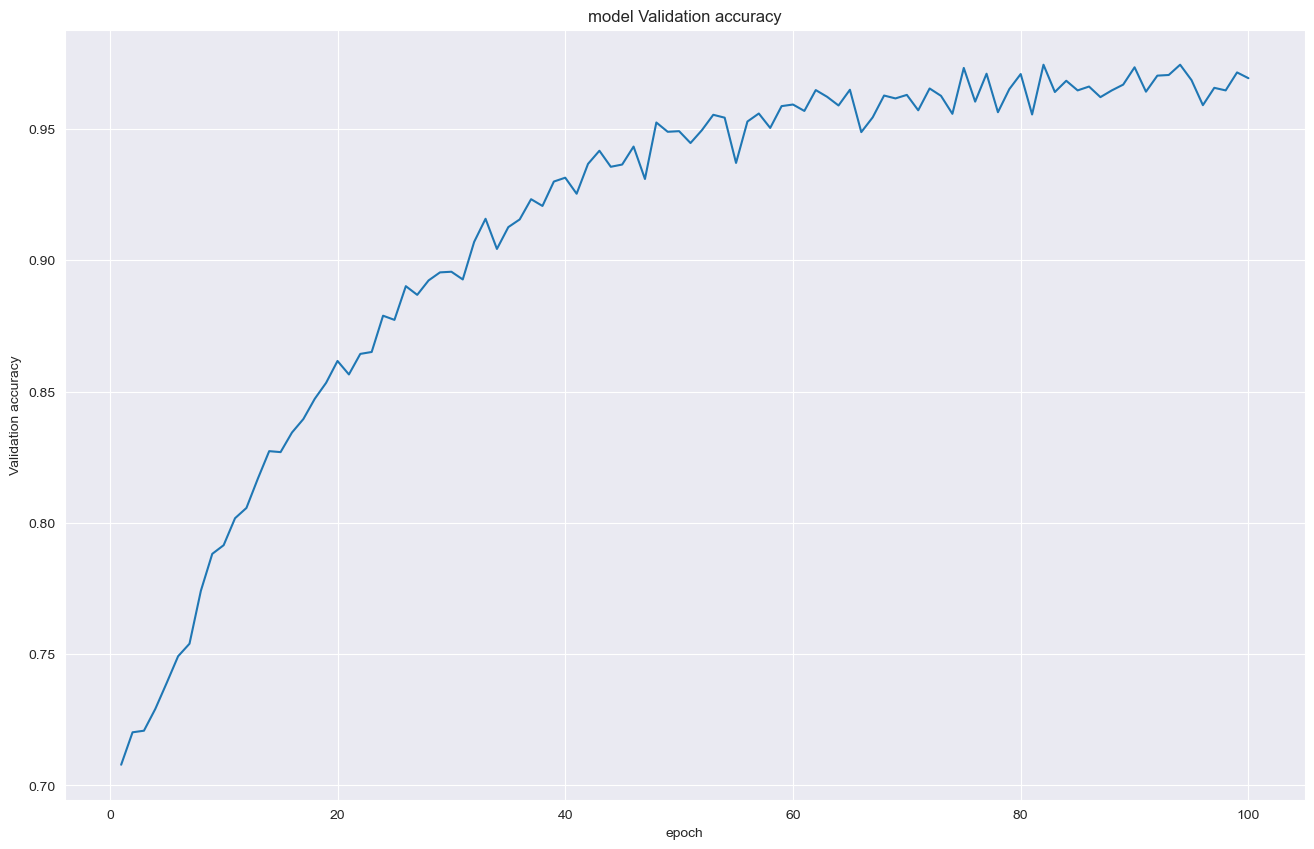

In [734]:

plt.figure(figsize=(16, 10))

sns.lineplot(x=x1, y=history_2.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.figure(figsize=(16, 10))

sns.lineplot(x=x1, y=history_2.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

plt.figure(figsize=(16, 10))

sns.lineplot(x=x1, y=history_2.history['val_loss'])
plt.title('model Validation loss')
plt.ylabel('Validation loss')
plt.xlabel('epoch')
plt.show()

plt.figure(figsize=(16, 10))

sns.lineplot(x=x1, y=history_2.history['val_accuracy'])
plt.title('model Validation accuracy')
plt.ylabel('Validation accuracy')
plt.xlabel('epoch')
plt.show()

In [700]:
XTRAIN_column_3 = XTRAIN_dataframe.drop(columns = [6, 9, 5], axis = 1)
XTRAIN_column_3.head(10)

,0,1,2,3,4,7,8
0,0.895130,1.048489,-0.521552,-0.382660,0.466409,1.818047,1.944831
1,0.895130,-0.940027,-0.521552,-0.382660,0.466409,1.096042,1.462043
2,-1.117129,1.788401,-0.521552,-0.382660,-2.143988,-0.576069,-1.098193
3,-1.117129,-0.801293,-0.521552,-0.382660,0.466409,-0.717830,-0.235028
4,0.895130,1.418445,-0.521552,-0.382660,0.466409,-0.915182,2.544658
5,0.895130,-1.679940,1.917307,2.613221,0.466409,0.492866,2.061870
6,0.895130,-0.801293,-0.521552,-0.382660,-2.143988,-0.244948,-0.512997
7,-1.117129,-1.402472,-0.521552,-0.382660,0.466409,-0.351442,-0.776335
8,0.895130,-0.246359,-0.521552,-0.382660,0.466409,-0.812858,-1.142083
9,0.895130,-0.477581,1.917307,-0.382660,0.466409,0.904075,-0.937264


In [701]:
XVALIDATION_column_3 = XVALIDATION_dataframe.drop(columns = [6, 9, 5], axis = 1)
XVALIDATION_column_3.head(10)

,0,1,2,3,4,7,8
0,-1.117129,1.742157,-0.521552,-0.382660,0.466409,-0.794617,-0.878745
1,0.895130,0.216087,-0.521552,-0.382660,0.466409,-0.745278,3.276154
2,0.895130,0.493554,-0.521552,-0.382660,-2.143988,-0.570858,1.081665
3,0.895130,1.233467,-0.521552,-0.382660,0.466409,-1.108018,-1.463942
4,-1.117129,-0.153870,-0.521552,-0.382660,0.466409,-0.257456,1.198705
5,-1.117129,1.048489,-0.521552,-0.382660,0.466409,-1.006562,-0.147248
6,0.895130,0.123598,-0.521552,2.613221,0.466409,1.901956,0.949996
7,0.895130,-0.015136,-0.521552,-0.382660,-2.143988,-0.691423,-0.937264
8,0.895130,0.123598,-0.521552,-0.382660,0.466409,1.020124,-1.478572
9,-1.117129,-1.818673,-0.521552,2.613221,0.466409,-1.089777,0.277019


In [713]:
model_3 = Sequential()

model_3.add(Dense(64, input_dim=XTRAIN_column_3.shape[1], activation = "tanh"))
model_3.add(Dense(32, activation = "tanh"))
model_3.add(Dense(16, activation = "tanh"))
model_3.add(Dense(8, activation = "tanh"))
model_3.add(Dense(1, activation = "sigmoid"))

In [714]:
model_3.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

# Define checkpoint callback
checkpoint_callback = ModelCheckpoint("best_of_models.hdf5", monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [715]:
history_3 = model_3.fit(XTRAIN_column_3, YTRAIN, epochs=100, validation_data=(XVALIDATION_column_3, YVALIDATION), callbacks=[checkpoint_callback])

Epoch 1/100
1006/1023 [============================>.] - ETA: 0s - loss: 0.5932 - accuracy: 0.6900
Epoch 1: val_loss improved from inf to 0.57663, saving model to best_of_models.hdf5
1023/1023 [==============================] - 3s 2ms/step - loss: 0.5929 - accuracy: 0.6900 - val_loss: 0.5766 - val_accuracy: 0.7005
Epoch 2/100
1019/1023 [============================>.] - ETA: 0s - loss: 0.5787 - accuracy: 0.6974
Epoch 2: val_loss improved from 0.57663 to 0.56804, saving model to best_of_models.hdf5
1023/1023 [==============================] - 2s 2ms/step - loss: 0.5786 - accuracy: 0.6976 - val_loss: 0.5680 - val_accuracy: 0.7087
Epoch 3/100
1000/1023 [============================>.] - ETA: 0s - loss: 0.5706 - accuracy: 0.7017
Epoch 3: val_loss improved from 0.56804 to 0.56067, saving model to best_of_models.hdf5
1023/1023 [==============================] - 2s 2ms/step - loss: 0.5705 - accuracy: 0.7019 - val_loss: 0.5607 - val_accuracy: 0.7091
Epoch 4/100
1020/1023 [=====================

In [751]:
acc_excludingWorktype = history_3.history['val_accuracy'][99]
acc_excludingWorktype

0.9322820901870728

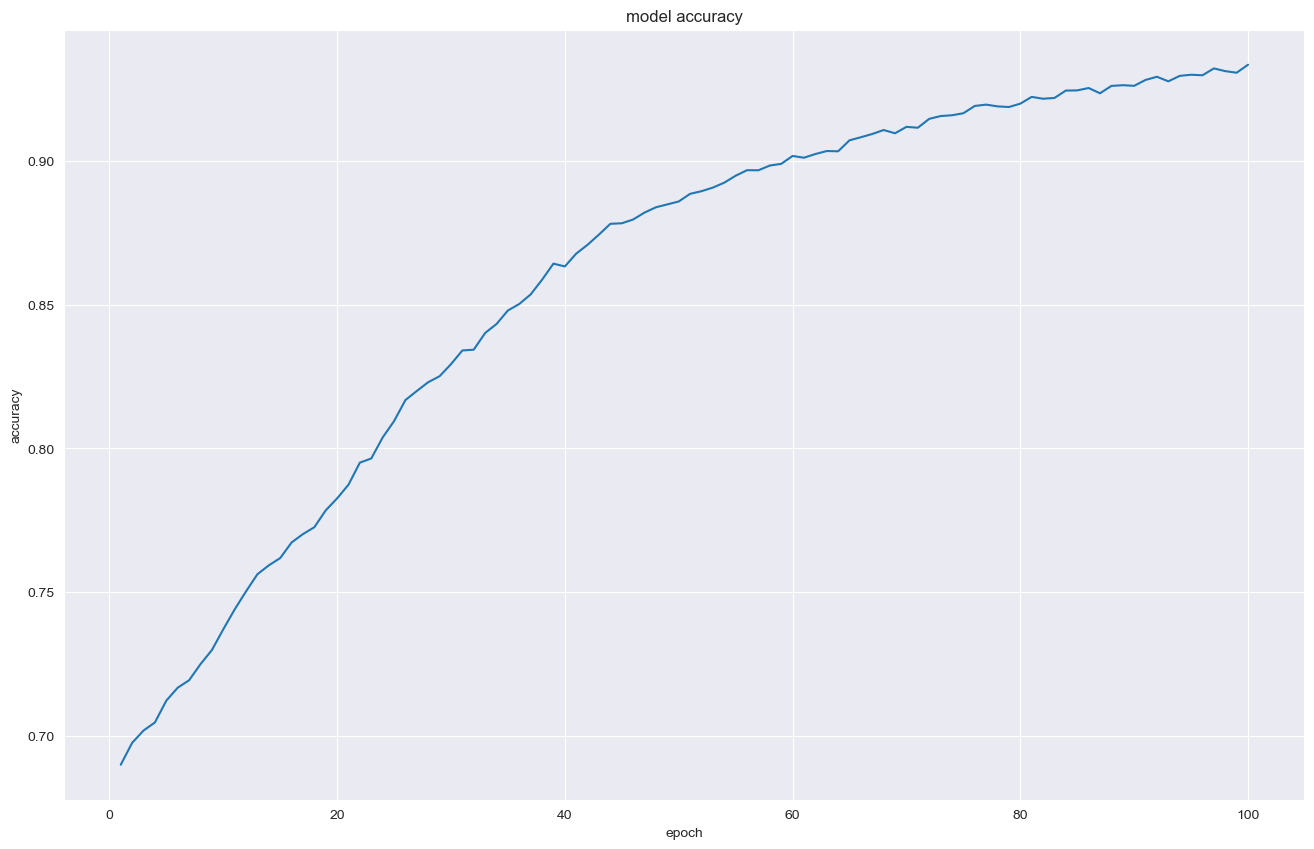

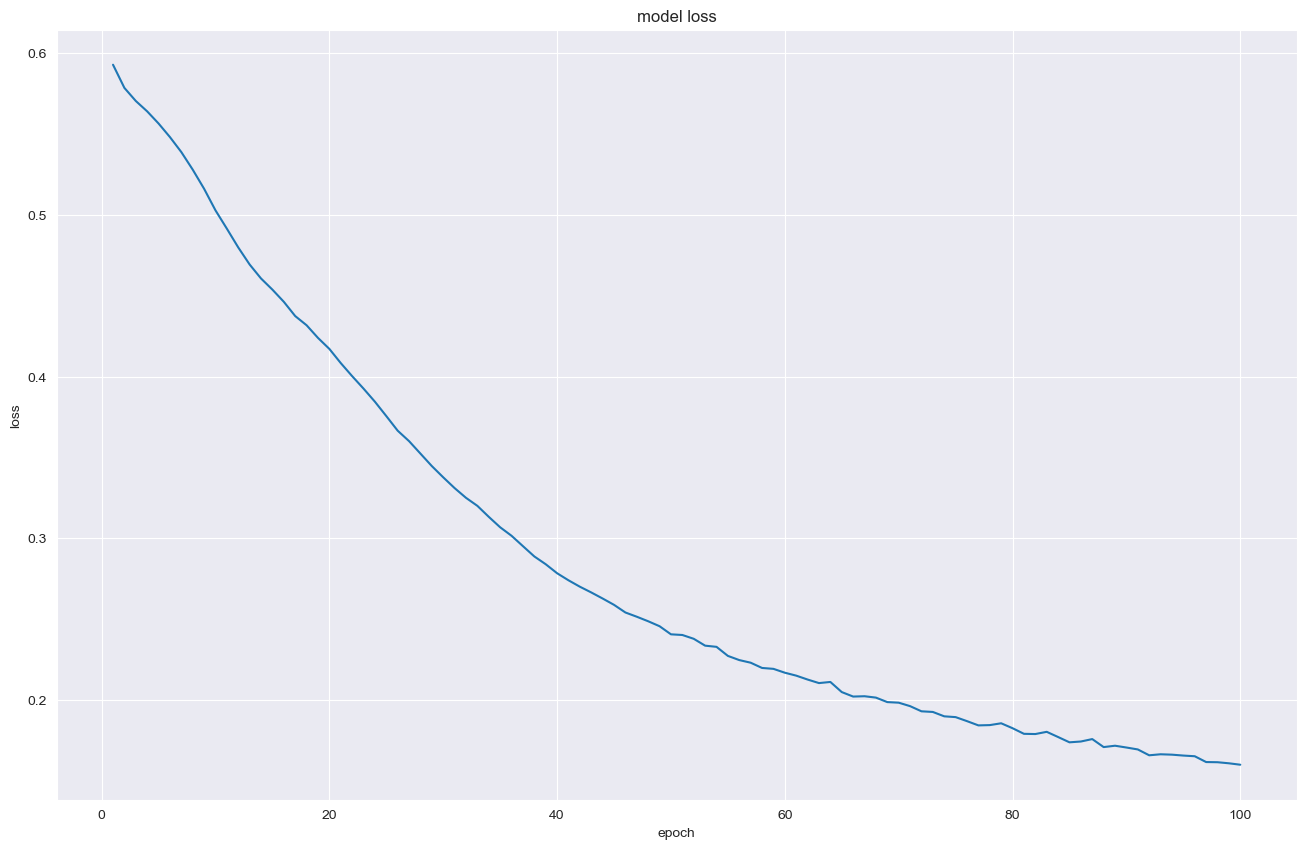

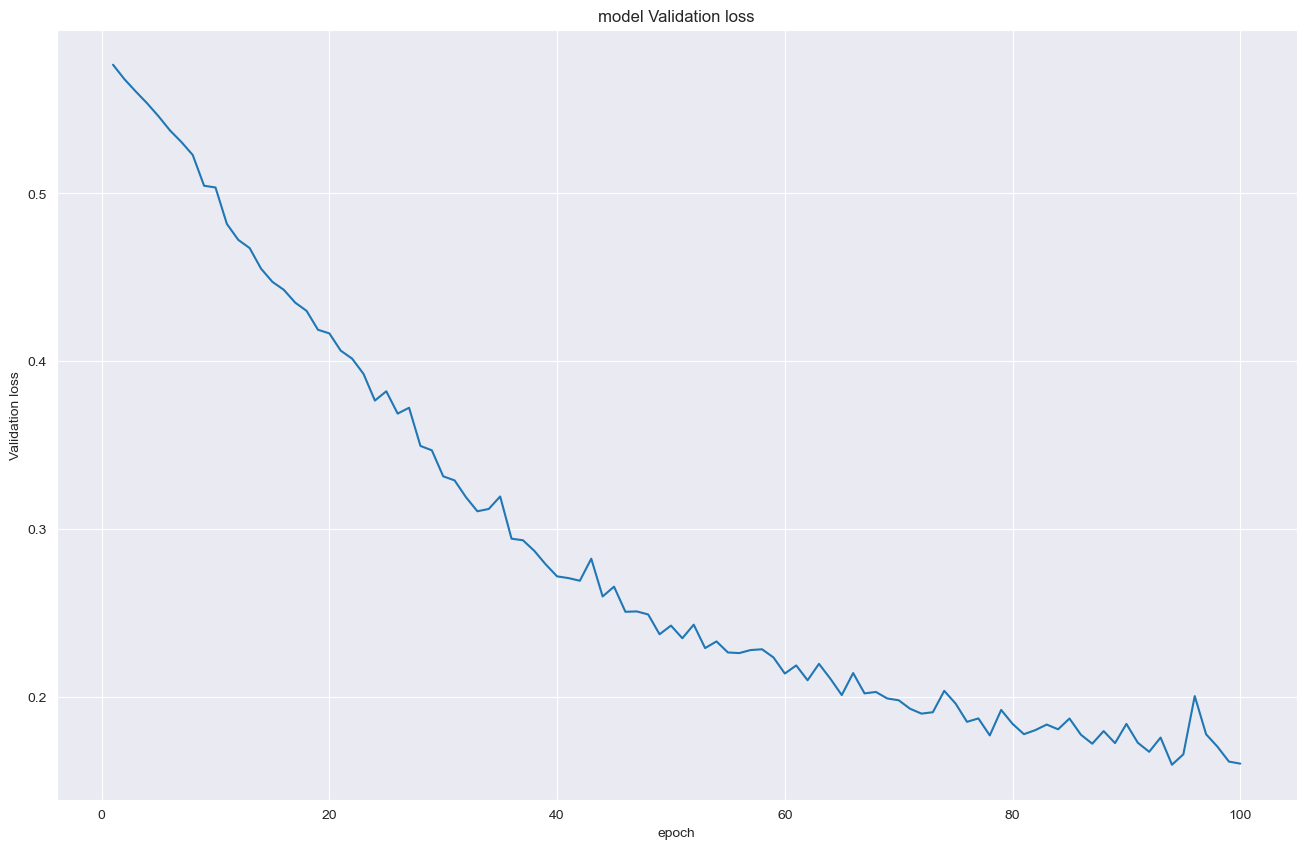

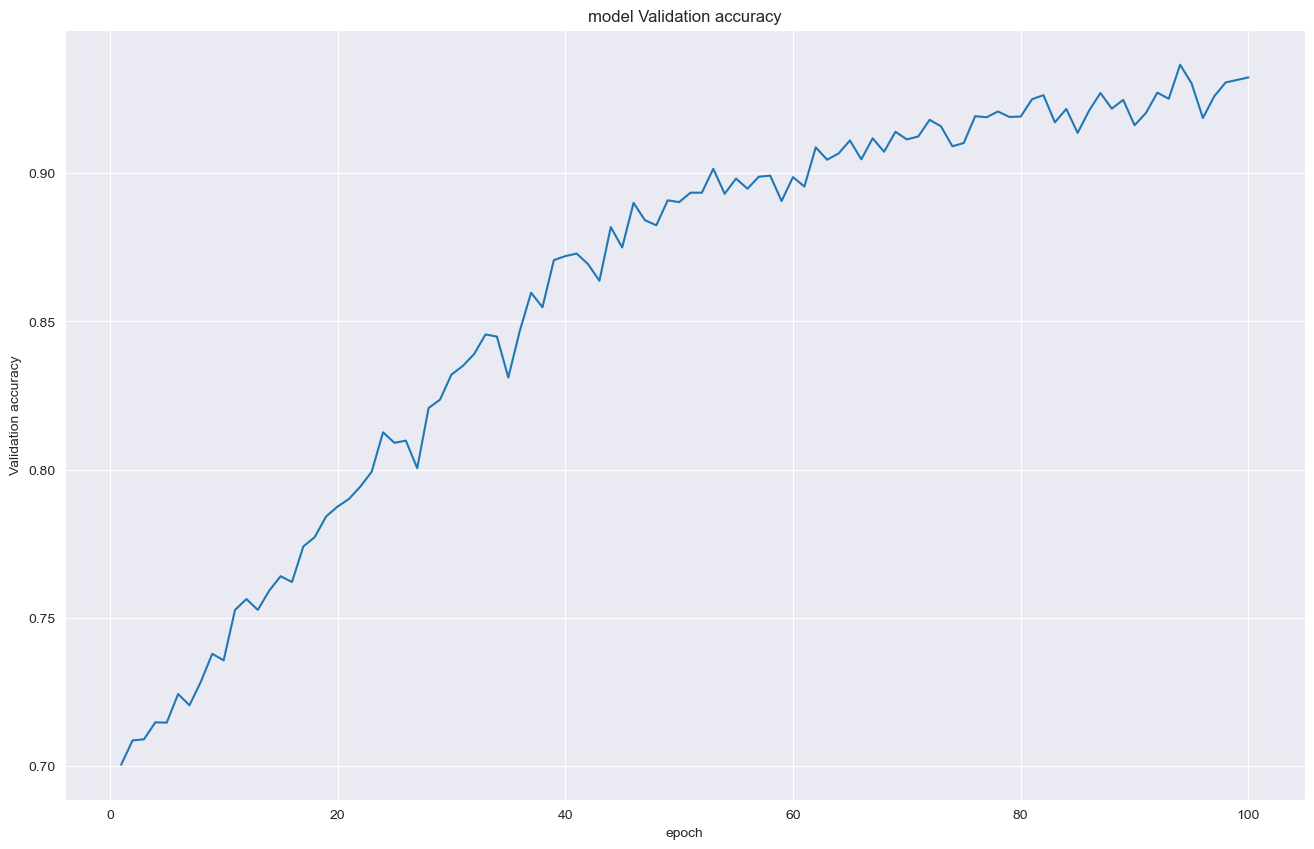

In [728]:

plt.figure(figsize=(16, 10))

sns.lineplot(x=x1, y=history_3.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.figure(figsize=(16, 10))

sns.lineplot(x=x1, y=history_3.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

plt.figure(figsize=(16, 10))

sns.lineplot(x=x1, y=history_3.history['val_loss'])
plt.title('model Validation loss')
plt.ylabel('Validation loss')
plt.xlabel('epoch')
plt.show()

plt.figure(figsize=(16, 10))

sns.lineplot(x=x1, y=history_3.history['val_accuracy'])
plt.title('model Validation accuracy')
plt.ylabel('Validation accuracy')
plt.xlabel('epoch')
plt.show()

In [717]:
XTRAIN_column_4 = XTRAIN_dataframe.drop(columns = [6, 9, 5, 0], axis = 1)
XTRAIN_column_4.head(10)

,1,2,3,4,7,8
0,1.048489,-0.521552,-0.382660,0.466409,1.818047,1.944831
1,-0.940027,-0.521552,-0.382660,0.466409,1.096042,1.462043
2,1.788401,-0.521552,-0.382660,-2.143988,-0.576069,-1.098193
3,-0.801293,-0.521552,-0.382660,0.466409,-0.717830,-0.235028
4,1.418445,-0.521552,-0.382660,0.466409,-0.915182,2.544658
5,-1.679940,1.917307,2.613221,0.466409,0.492866,2.061870
6,-0.801293,-0.521552,-0.382660,-2.143988,-0.244948,-0.512997
7,-1.402472,-0.521552,-0.382660,0.466409,-0.351442,-0.776335
8,-0.246359,-0.521552,-0.382660,0.466409,-0.812858,-1.142083
9,-0.477581,1.917307,-0.382660,0.466409,0.904075,-0.937264


In [718]:
XVALIDATION_column_4 = XVALIDATION_dataframe.drop(columns = [6, 9, 5, 0], axis = 1)
XVALIDATION_column_4.head(10)

,1,2,3,4,7,8
0,1.742157,-0.521552,-0.382660,0.466409,-0.794617,-0.878745
1,0.216087,-0.521552,-0.382660,0.466409,-0.745278,3.276154
2,0.493554,-0.521552,-0.382660,-2.143988,-0.570858,1.081665
3,1.233467,-0.521552,-0.382660,0.466409,-1.108018,-1.463942
4,-0.153870,-0.521552,-0.382660,0.466409,-0.257456,1.198705
5,1.048489,-0.521552,-0.382660,0.466409,-1.006562,-0.147248
6,0.123598,-0.521552,2.613221,0.466409,1.901956,0.949996
7,-0.015136,-0.521552,-0.382660,-2.143988,-0.691423,-0.937264
8,0.123598,-0.521552,-0.382660,0.466409,1.020124,-1.478572
9,-1.818673,-0.521552,2.613221,0.466409,-1.089777,0.277019


In [719]:
model_4 = Sequential()

model_4.add(Dense(64, input_dim=XTRAIN_column_4.shape[1], activation = "tanh"))
model_4.add(Dense(32, activation = "tanh"))
model_4.add(Dense(16, activation = "tanh"))
model_4.add(Dense(8, activation = "tanh"))
model_4.add(Dense(1, activation = "sigmoid"))

In [720]:
model_4.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

# Define checkpoint callback
checkpoint_callback = ModelCheckpoint("best.hdf5", monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [721]:
history_4 = model_4.fit(XTRAIN_column_4, YTRAIN, epochs=100, validation_data=(XVALIDATION_column_4, YVALIDATION), callbacks=[checkpoint_callback])

Epoch 1/100
1016/1023 [============================>.] - ETA: 0s - loss: 0.5929 - accuracy: 0.6879
Epoch 1: val_loss improved from inf to 0.57584, saving model to best.hdf5
1023/1023 [==============================] - 3s 2ms/step - loss: 0.5928 - accuracy: 0.6879 - val_loss: 0.5758 - val_accuracy: 0.7010
Epoch 2/100
 993/1023 [============================>.] - ETA: 0s - loss: 0.5785 - accuracy: 0.6946
Epoch 2: val_loss improved from 0.57584 to 0.56622, saving model to best.hdf5
1023/1023 [==============================] - 2s 2ms/step - loss: 0.5782 - accuracy: 0.6950 - val_loss: 0.5662 - val_accuracy: 0.7058
Epoch 3/100
1018/1023 [============================>.] - ETA: 0s - loss: 0.5695 - accuracy: 0.7005
Epoch 3: val_loss improved from 0.56622 to 0.56083, saving model to best.hdf5
1023/1023 [==============================] - 2s 2ms/step - loss: 0.5697 - accuracy: 0.7003 - val_loss: 0.5608 - val_accuracy: 0.6969
Epoch 4/100
1003/1023 [============================>.] - ETA: 0s - loss: 0

In [754]:
acc_excludingSex = history_4.history['val_accuracy'][99]
acc_excludingSex

0.9119911789894104

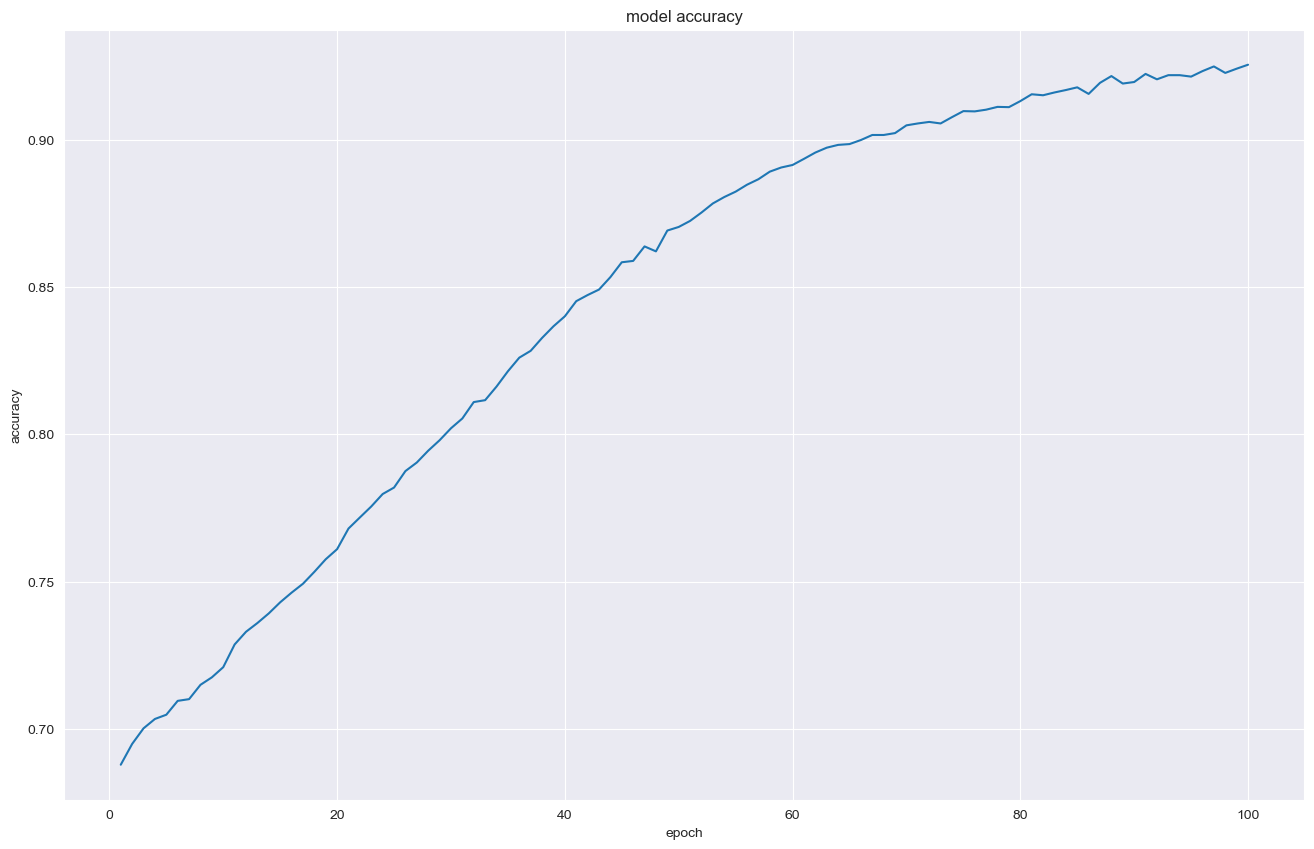

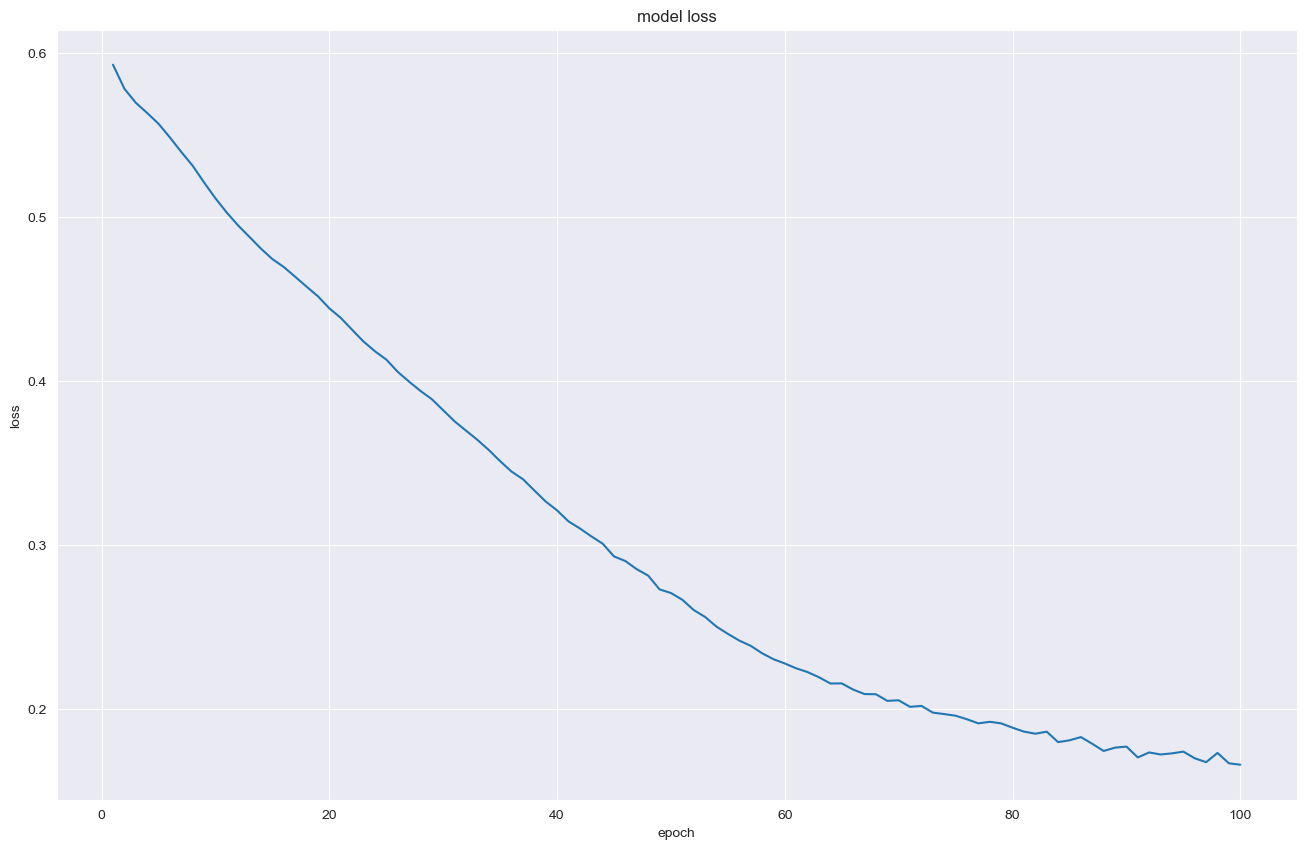

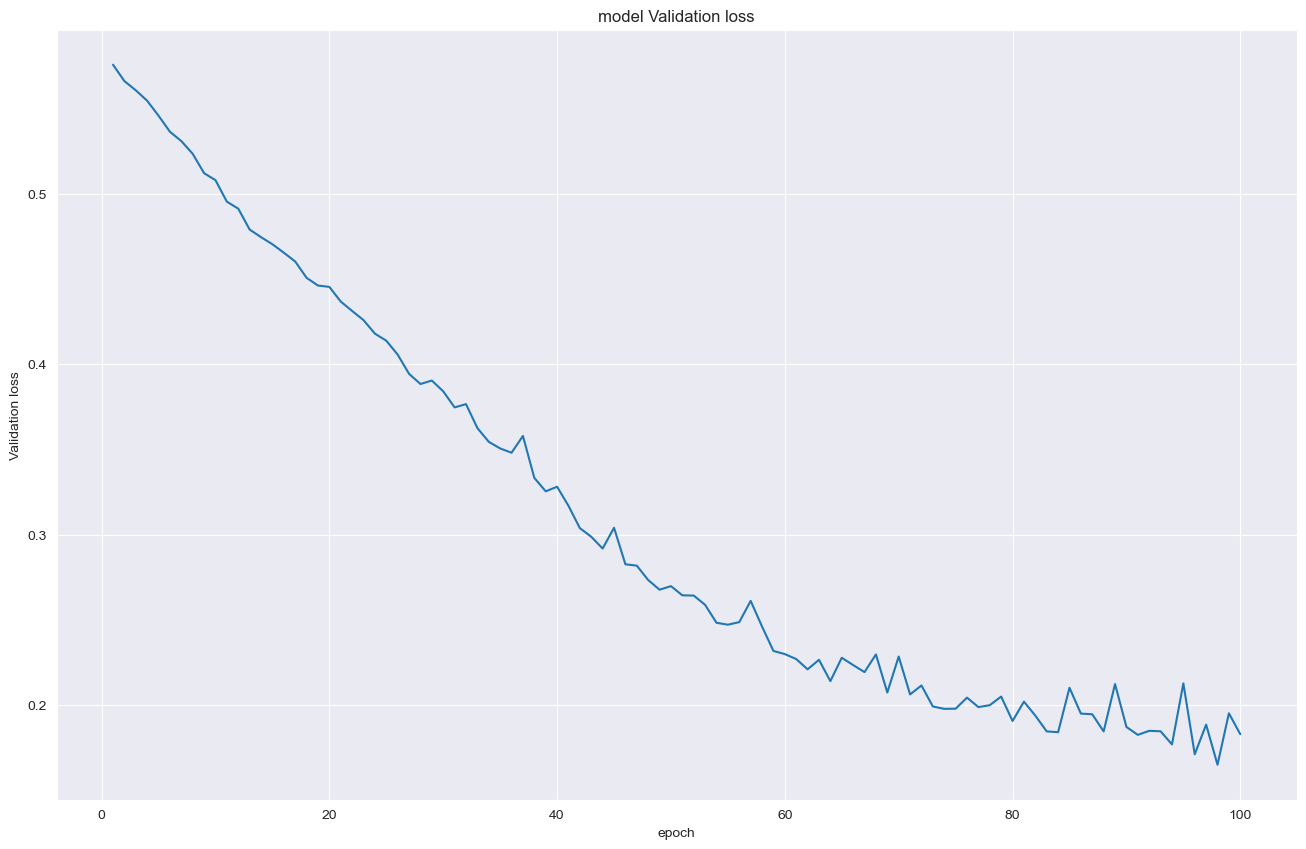

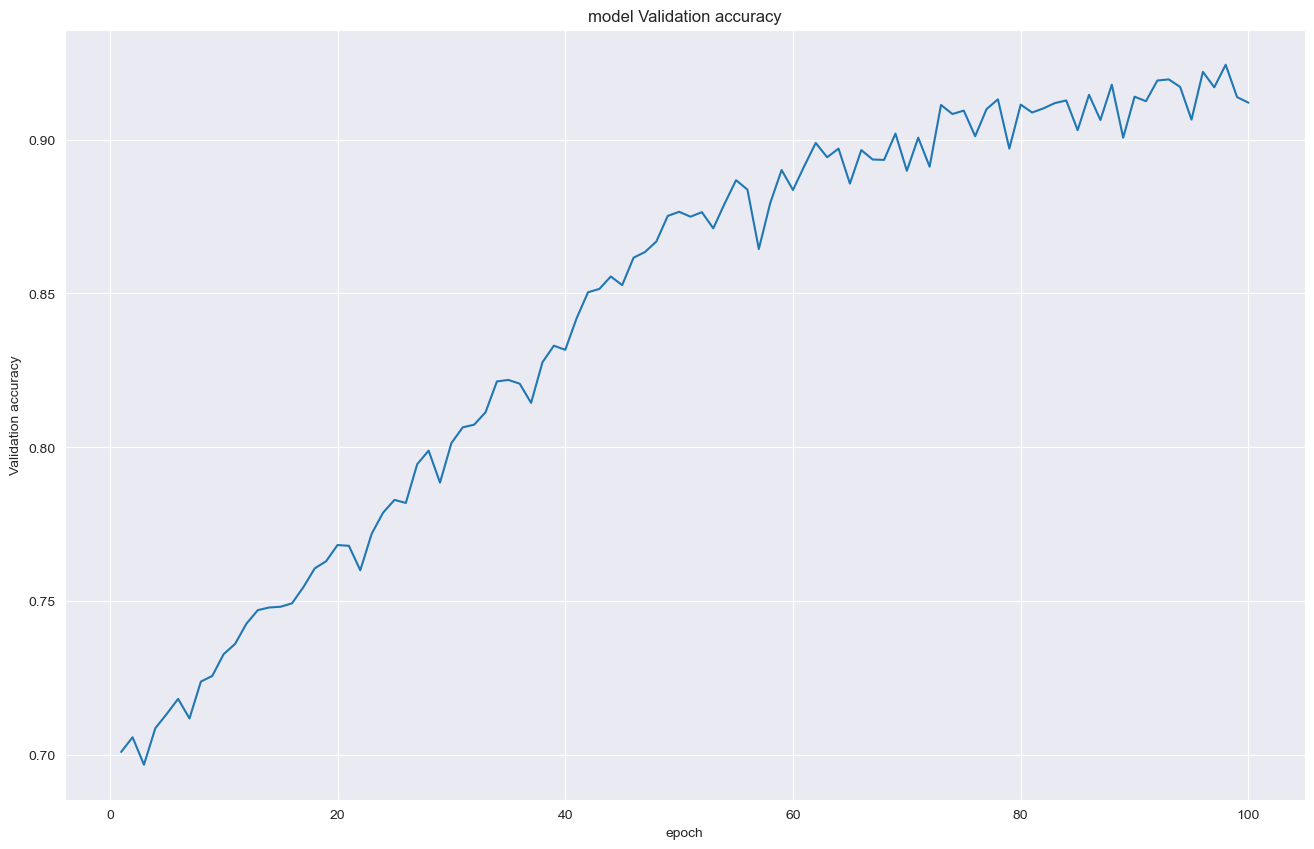

In [727]:

plt.figure(figsize=(16, 10))

sns.lineplot(x=x1, y=history_4.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.figure(figsize=(16, 10))

sns.lineplot(x=x1, y=history_4.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

plt.figure(figsize=(16, 10))

sns.lineplot(x=x1, y=history_4.history['val_loss'])
plt.title('model Validation loss')
plt.ylabel('Validation loss')
plt.xlabel('epoch')
plt.show()

plt.figure(figsize=(16, 10))

sns.lineplot(x=x1, y=history_4.history['val_accuracy'])
plt.title('model Validation accuracy')
plt.ylabel('Validation accuracy')
plt.xlabel('epoch')
plt.show()

In [755]:
XTRAIN_column_5 = XTRAIN_dataframe.drop(columns = [6, 9, 5, 0, 4], axis = 1)
XTRAIN_column_5.head(10)

,1,2,3,7,8
0,1.048489,-0.521552,-0.382660,1.818047,1.944831
1,-0.940027,-0.521552,-0.382660,1.096042,1.462043
2,1.788401,-0.521552,-0.382660,-0.576069,-1.098193
3,-0.801293,-0.521552,-0.382660,-0.717830,-0.235028
4,1.418445,-0.521552,-0.382660,-0.915182,2.544658
5,-1.679940,1.917307,2.613221,0.492866,2.061870
6,-0.801293,-0.521552,-0.382660,-0.244948,-0.512997
7,-1.402472,-0.521552,-0.382660,-0.351442,-0.776335
8,-0.246359,-0.521552,-0.382660,-0.812858,-1.142083
9,-0.477581,1.917307,-0.382660,0.904075,-0.937264


In [756]:
XVALIDATION_column_5 = XVALIDATION_dataframe.drop(columns = [6, 9, 5, 0, 4], axis = 1)
XVALIDATION_column_5.head(10)

,1,2,3,7,8
0,1.742157,-0.521552,-0.382660,-0.794617,-0.878745
1,0.216087,-0.521552,-0.382660,-0.745278,3.276154
2,0.493554,-0.521552,-0.382660,-0.570858,1.081665
3,1.233467,-0.521552,-0.382660,-1.108018,-1.463942
4,-0.153870,-0.521552,-0.382660,-0.257456,1.198705
5,1.048489,-0.521552,-0.382660,-1.006562,-0.147248
6,0.123598,-0.521552,2.613221,1.901956,0.949996
7,-0.015136,-0.521552,-0.382660,-0.691423,-0.937264
8,0.123598,-0.521552,-0.382660,1.020124,-1.478572
9,-1.818673,-0.521552,2.613221,-1.089777,0.277019


In [757]:
model_5 = Sequential()

model_5.add(Dense(64, input_dim=XTRAIN_column_5.shape[1], activation = "tanh"))
model_5.add(Dense(32, activation = "tanh"))
model_5.add(Dense(16, activation = "tanh"))
model_5.add(Dense(8, activation = "tanh"))
model_5.add(Dense(1, activation = "sigmoid"))

In [758]:
model_5.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

# Define checkpoint callback
checkpoint_callback = ModelCheckpoint("best_Weights_afterEverMarried.hdf5", monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [759]:
history_5 = model_5.fit(XTRAIN_column_5, YTRAIN, epochs=100, validation_data=(XVALIDATION_column_5, YVALIDATION), callbacks=[checkpoint_callback])

Epoch 1/100
1002/1023 [============================>.] - ETA: 0s - loss: 0.6066 - accuracy: 0.6802
Epoch 1: val_loss improved from inf to 0.59148, saving model to best_Weights_afterEverMarried.hdf5
1023/1023 [==============================] - 5s 3ms/step - loss: 0.6070 - accuracy: 0.6801 - val_loss: 0.5915 - val_accuracy: 0.6964
Epoch 2/100
 994/1023 [============================>.] - ETA: 0s - loss: 0.5948 - accuracy: 0.6886
Epoch 2: val_loss improved from 0.59148 to 0.58323, saving model to best_Weights_afterEverMarried.hdf5
1023/1023 [==============================] - 3s 3ms/step - loss: 0.5942 - accuracy: 0.6894 - val_loss: 0.5832 - val_accuracy: 0.7003
Epoch 3/100
1004/1023 [============================>.] - ETA: 0s - loss: 0.5888 - accuracy: 0.6934
Epoch 3: val_loss improved from 0.58323 to 0.57920, saving model to best_Weights_afterEverMarried.hdf5
1023/1023 [==============================] - 3s 3ms/step - loss: 0.5885 - accuracy: 0.6939 - val_loss: 0.5792 - val_accuracy: 0.7052

In [761]:
acc_excludingEverMarried = history_5.history['val_accuracy'][99]
acc_excludingEverMarried

0.9222589135169983

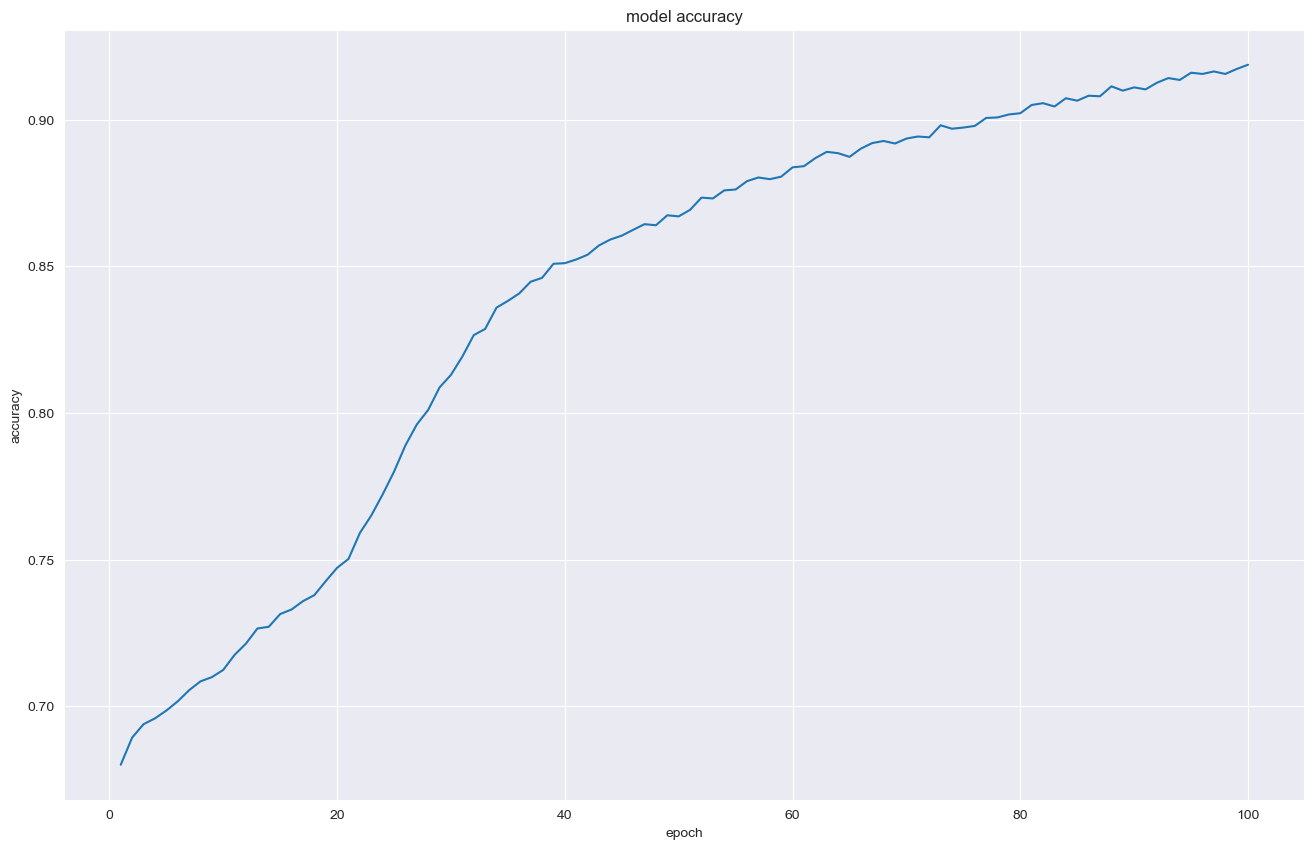

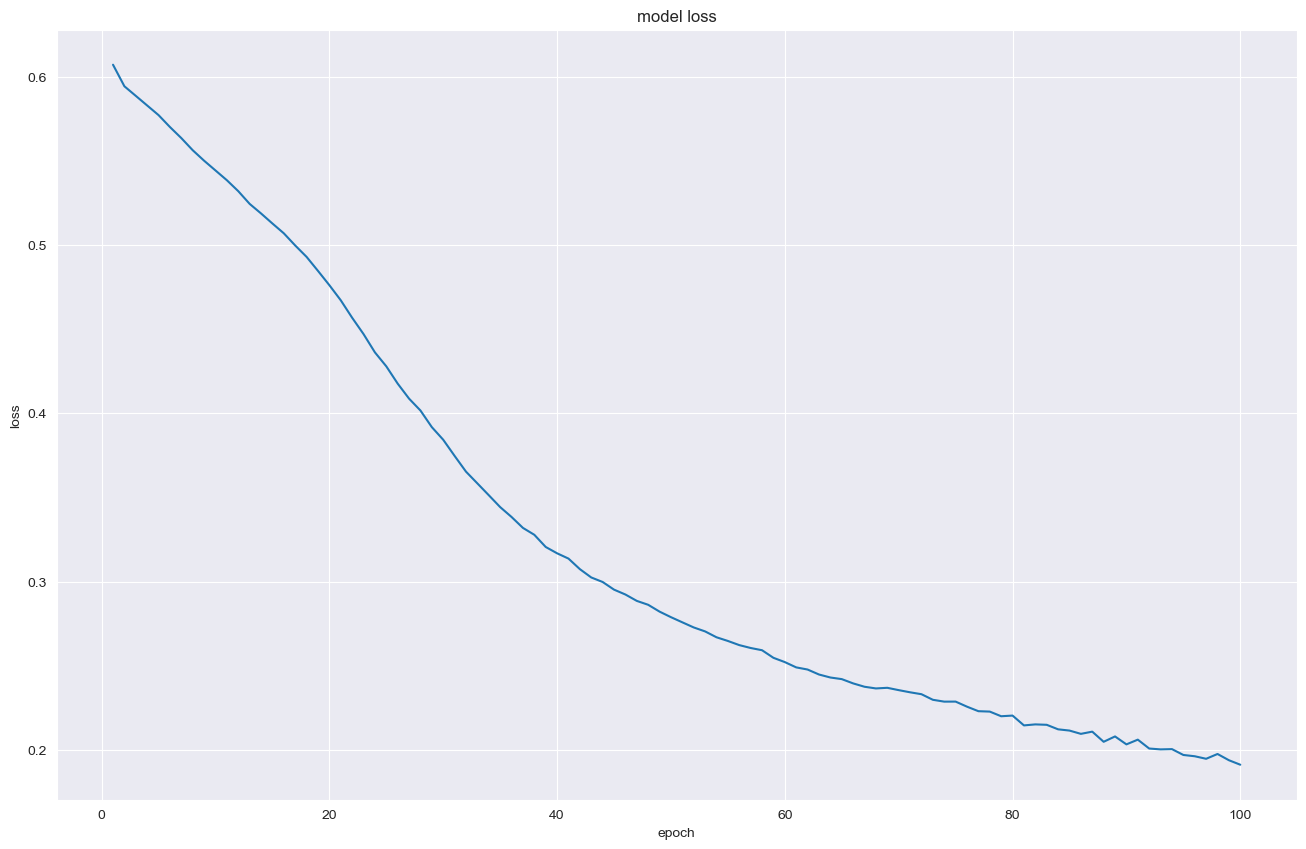

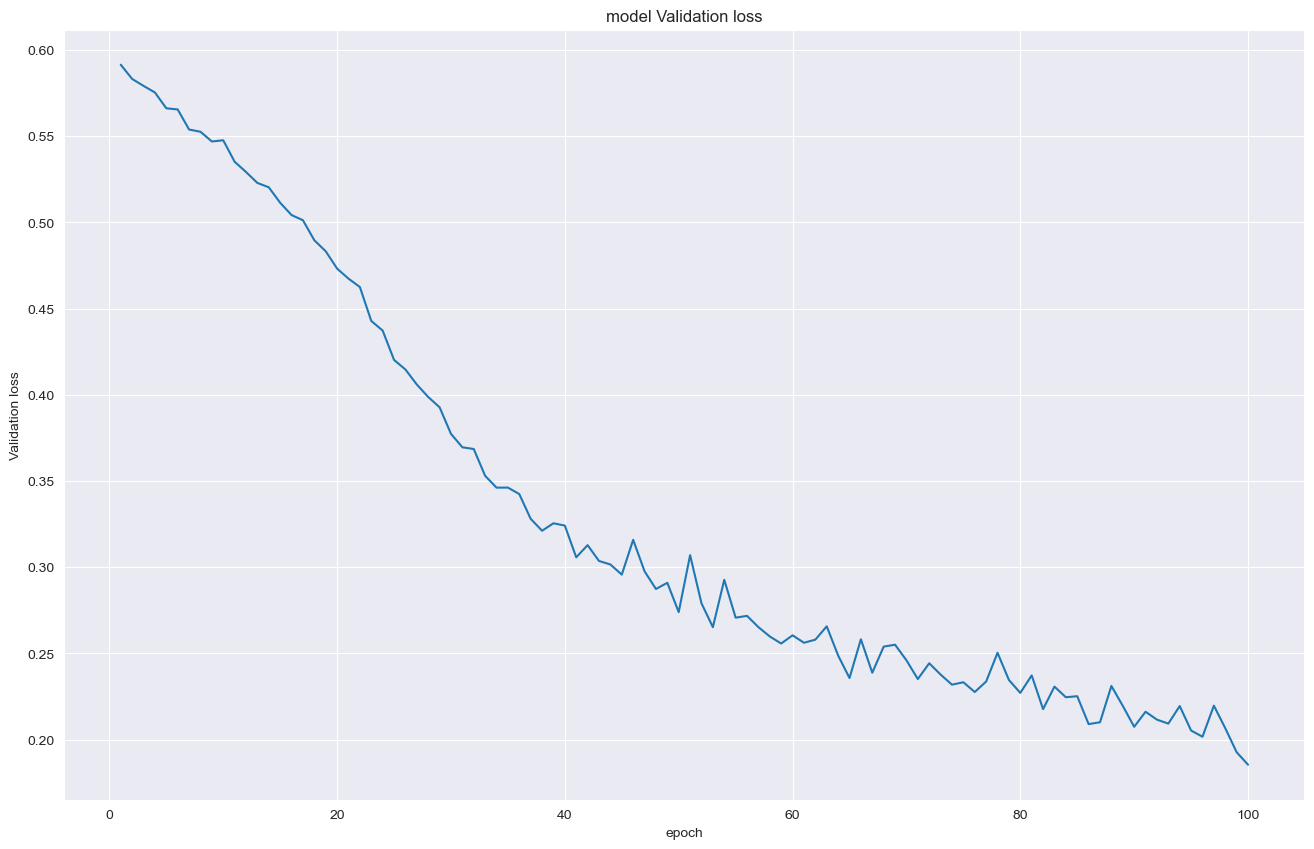

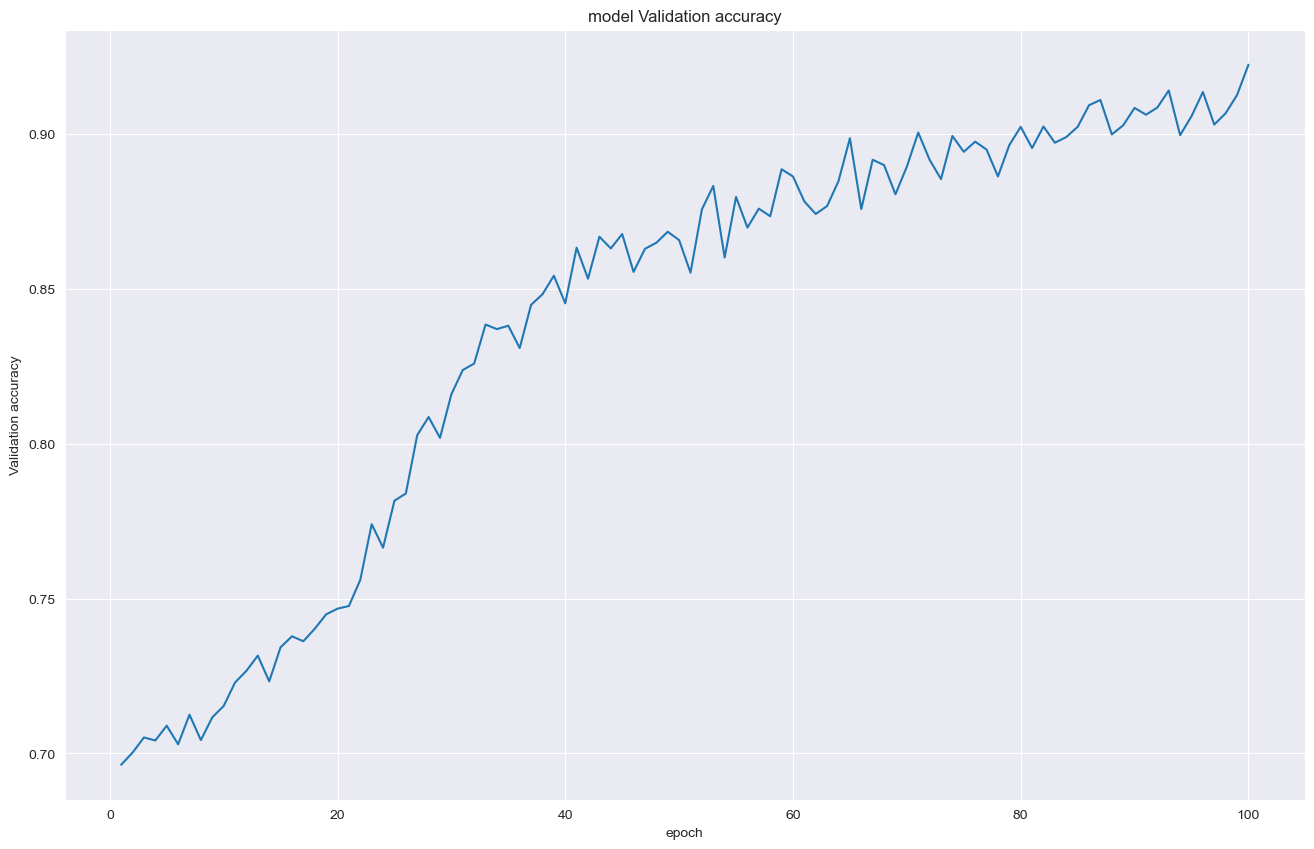

In [760]:

plt.figure(figsize=(16, 10))

sns.lineplot(x=x1, y=history_5.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.figure(figsize=(16, 10))

sns.lineplot(x=x1, y=history_5.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

plt.figure(figsize=(16, 10))

sns.lineplot(x=x1, y=history_5.history['val_loss'])
plt.title('model Validation loss')
plt.ylabel('Validation loss')
plt.xlabel('epoch')
plt.show()

plt.figure(figsize=(16, 10))

sns.lineplot(x=x1, y=history_5.history['val_accuracy'])
plt.title('model Validation accuracy')
plt.ylabel('Validation accuracy')
plt.xlabel('epoch')
plt.show()